## Graphing the historical drought lables

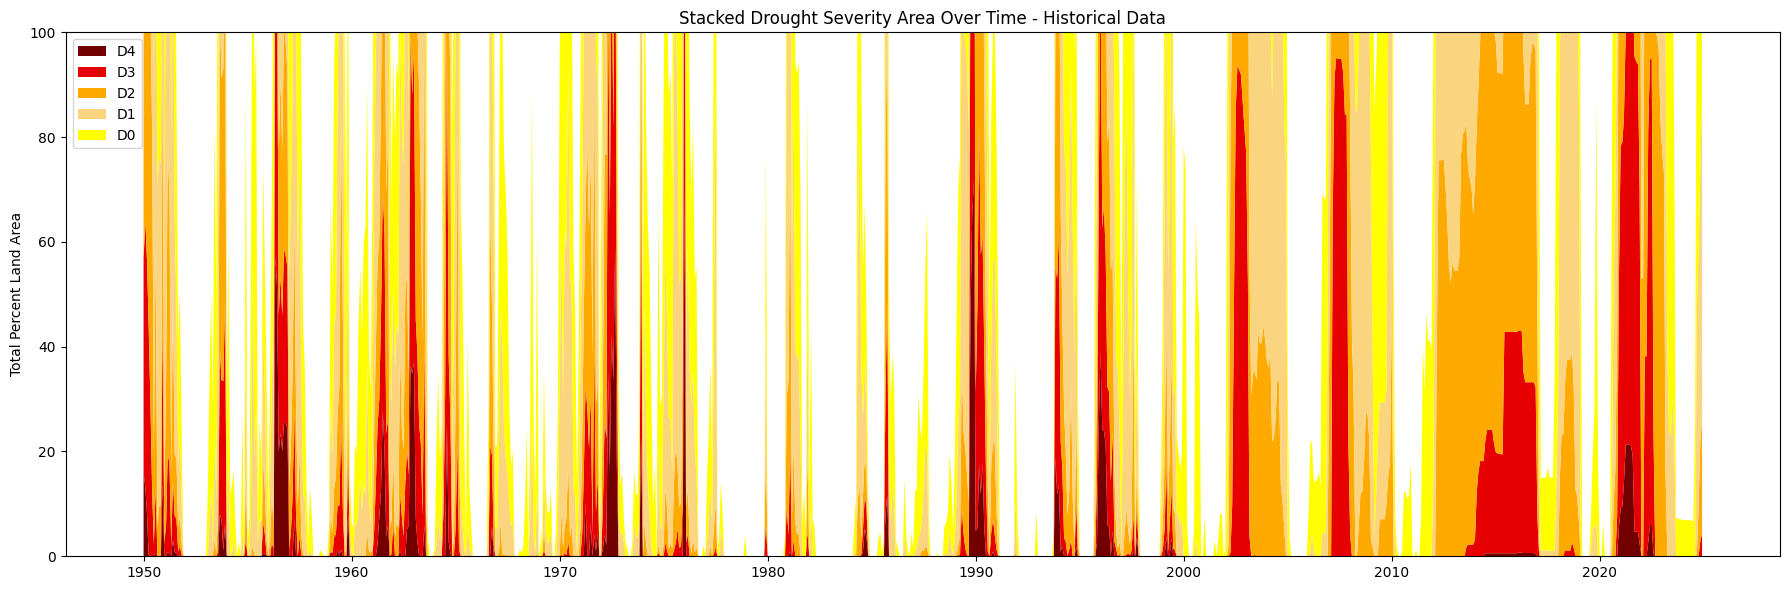

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (replace with your actual path if needed)
df = pd.read_csv('./final_historical.csv')

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

d0 = df['D0']
d1 = df['D1'] 
d2 = df['D2'] 
d3 = df['D3']
d4 = df['D4'] 


# Plot
plt.figure(figsize=(18, 6))
plt.stackplot(df['date'], d4, d3, d2, d1, d0,
              labels=['D4', 'D3', 'D2', 'D1', 'D0'],
              colors=['#730000', '#e60001', '#ffaa01', '#fbd47f', '#ffff00'])


# Axis and labels
plt.ylabel("Total Percent Land Area")
plt.title("Stacked Drought Severity Area Over Time - Historical Data")
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


## Running Historical Predictions with RF


====== RandomForest Full Data Prediction ======
D0 - MAE: 3.4447, R²: 0.9797


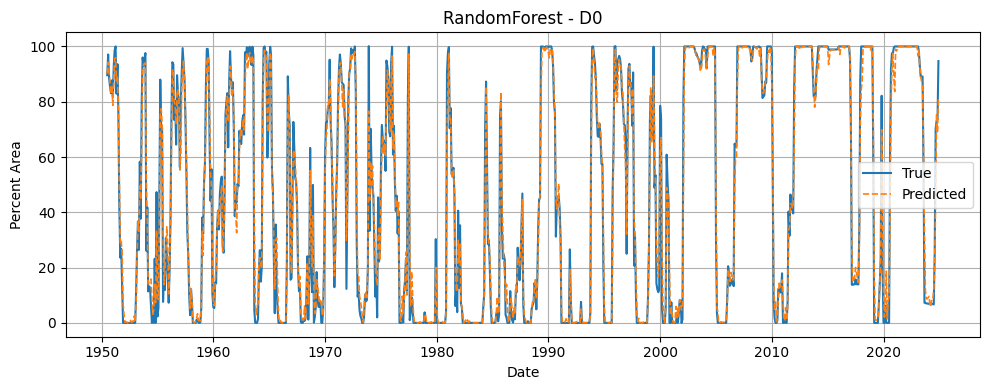

D1 - MAE: 3.0628, R²: 0.9802


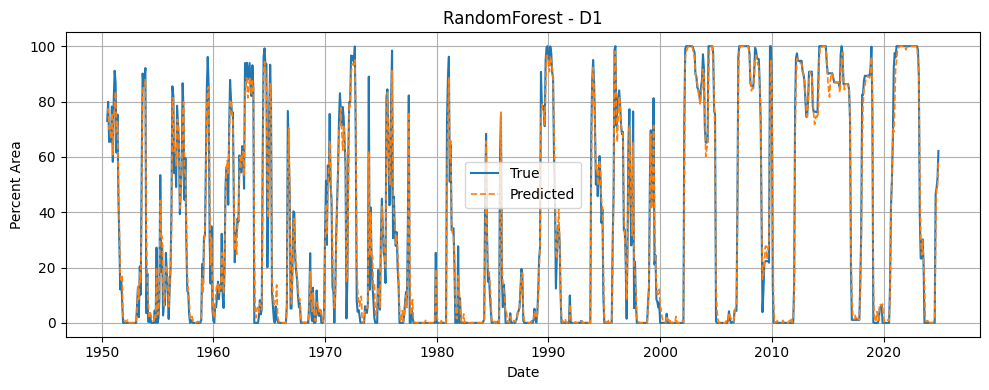

D2 - MAE: 2.1820, R²: 0.9788


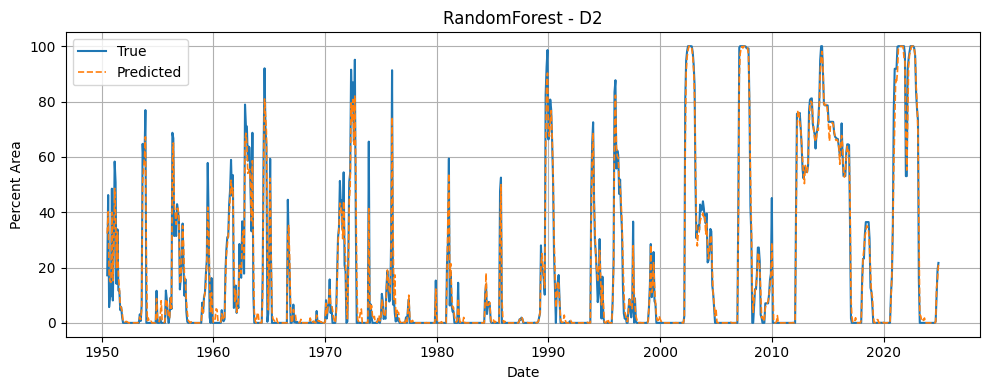

D3 - MAE: 1.4359, R²: 0.9693


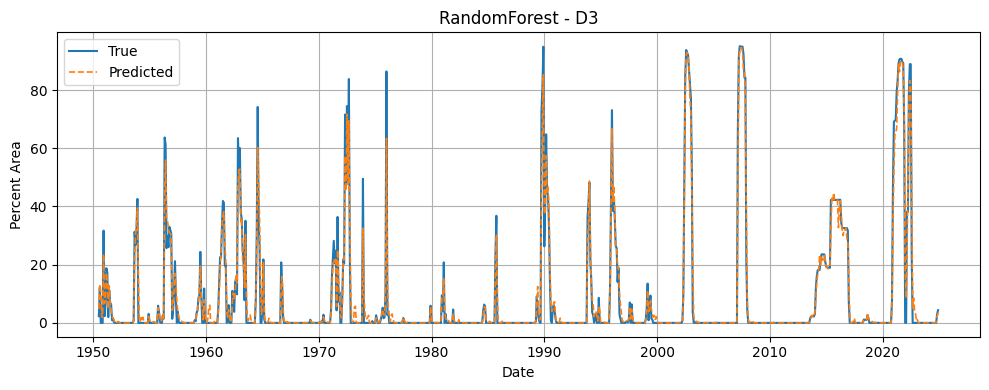

D4 - MAE: 0.5351, R²: 0.9399


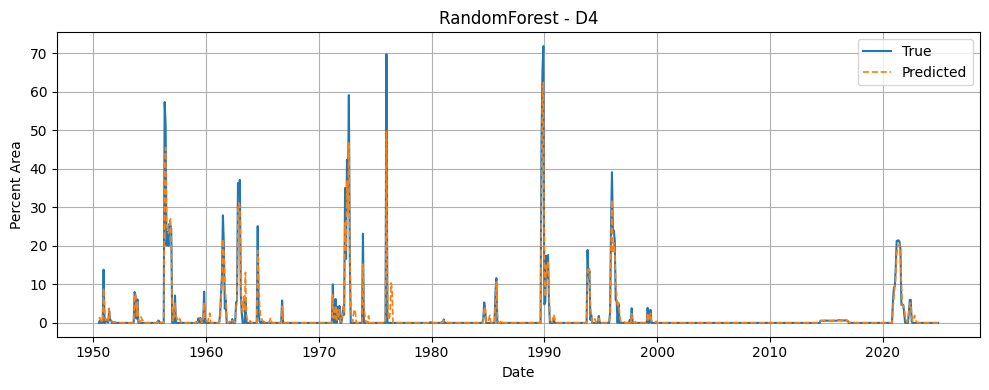

✅ Saved full predictions to 'historical_predicted_drought_rf_full.csv'


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Step 0: Load data
final_historical_df = pd.read_csv('./final_historical.csv')

# Step 1: Feature Engineering
df = final_historical_df.copy()
df['date'] = pd.to_datetime(df['date'])

for col in ['D0', 'D1', 'D2', 'D3', 'D4']:
    for lag in range(1, 4):
        df[f'{col}_lag{lag}'] = df[col].shift(lag)
    df[f'{col}_roll_mean'] = df[col].rolling(window=7).mean()
    df[f'{col}_roll_std'] = df[col].rolling(window=7).std()

df = df.dropna().reset_index(drop=True)

# Step 2: Features and Targets
X = df.drop(columns=['date', 'D0', 'D1', 'D2', 'D3', 'D4'])
y = df[['D0', 'D1', 'D2', 'D3', 'D4']]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train and predict on all data
full_predictions = []
results = {}

print("\n====== RandomForest Full Data Prediction ======")
for i, target in enumerate(['D0', 'D1', 'D2', 'D3', 'D4']):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_scaled, y.iloc[:, i].values)
    y_pred = model.predict(X_scaled)
    full_predictions.append(y_pred)

    mae = mean_absolute_error(y.iloc[:, i].values, y_pred)
    r2 = r2_score(y.iloc[:, i].values, y_pred)
    results[target] = {'MAE': mae, 'R2': r2}

    print(f"{target} - MAE: {mae:.4f}, R²: {r2:.4f}")

    # Plot true vs predicted
    plt.figure(figsize=(10, 4))
    plt.plot(df['date'], y.iloc[:, i].values, label='True', linewidth=1.5)
    plt.plot(df['date'], y_pred, label='Predicted', linewidth=1.2, linestyle='--')
    plt.title(f"RandomForest - {target}")
    plt.xlabel("Date")
    plt.ylabel("Percent Area")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Step 4: Save full predictions
full_pred_df = pd.DataFrame(full_predictions).T
full_pred_df.columns = ['D0', 'D1', 'D2', 'D3', 'D4']
full_pred_df.insert(0, 'date', df['date'])

full_pred_df.to_csv('historical_predicted_drought_rf_full.csv', index=False)
print("✅ Saved full predictions to 'historical_predicted_drought_rf_full.csv'")


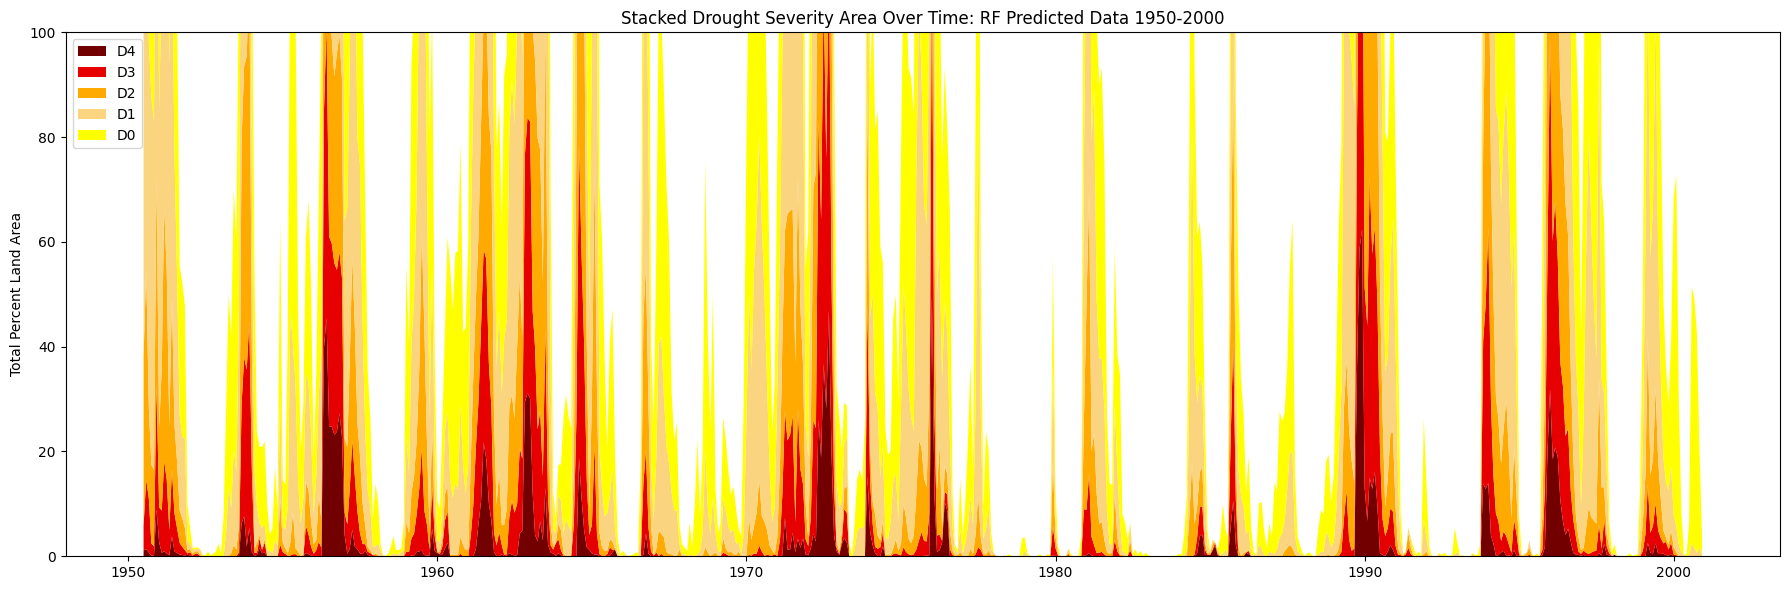

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (replace with your actual path if needed)
df = pd.read_csv('historical_predicted_drought_rf_full.csv')

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])
# Filter for 1950 to 2000
start_date = '1950-01-01'
end_date = '2000-12-31'
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df = df.loc[mask].reset_index(drop=True)


d0 = df['D0']
d1 = df['D1'] 
d2 = df['D2'] 
d3 = df['D3']
d4 = df['D4'] 


# Plot
plt.figure(figsize=(18, 6))
# plt.stackplot(df['date'], d0, d1, d2, d3, d4,
#               labels=['D0', 'D1', 'D2', 'D3', 'D4'],
#               colors=['#ffff00', '#fdae61', '#f46d43', '#d73027', '#7f0000'])

plt.stackplot(df['date'], d4, d3, d2, d1, d0,
              labels=['D4', 'D3', 'D2', 'D1', 'D0'],
              colors=['#730000', '#e60001', '#ffaa01', '#fbd47f', '#ffff00'])


# Axis and labels
plt.ylabel("Total Percent Land Area")
plt.title("Stacked Drought Severity Area Over Time: RF Predicted Data 1950-2000")
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


## comparing historical and predicted data 1950-2024

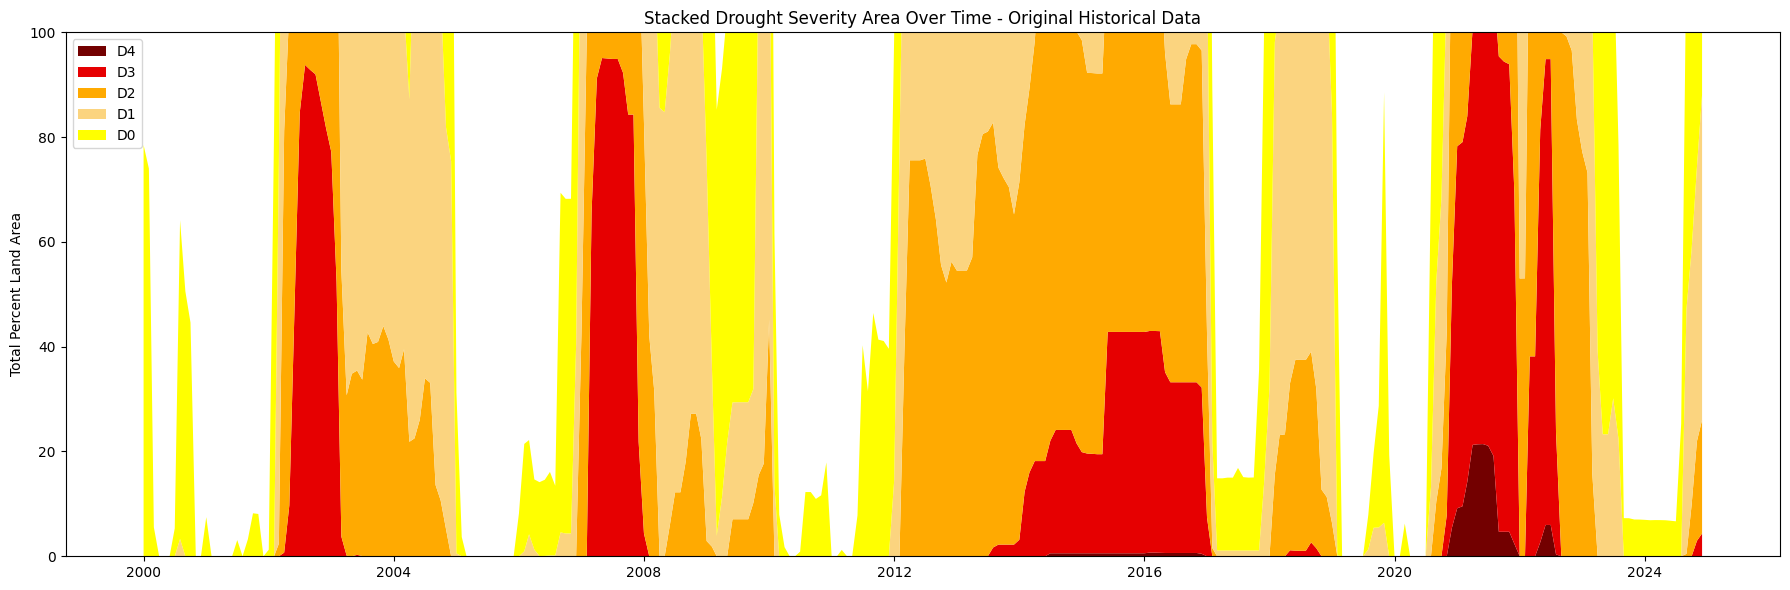

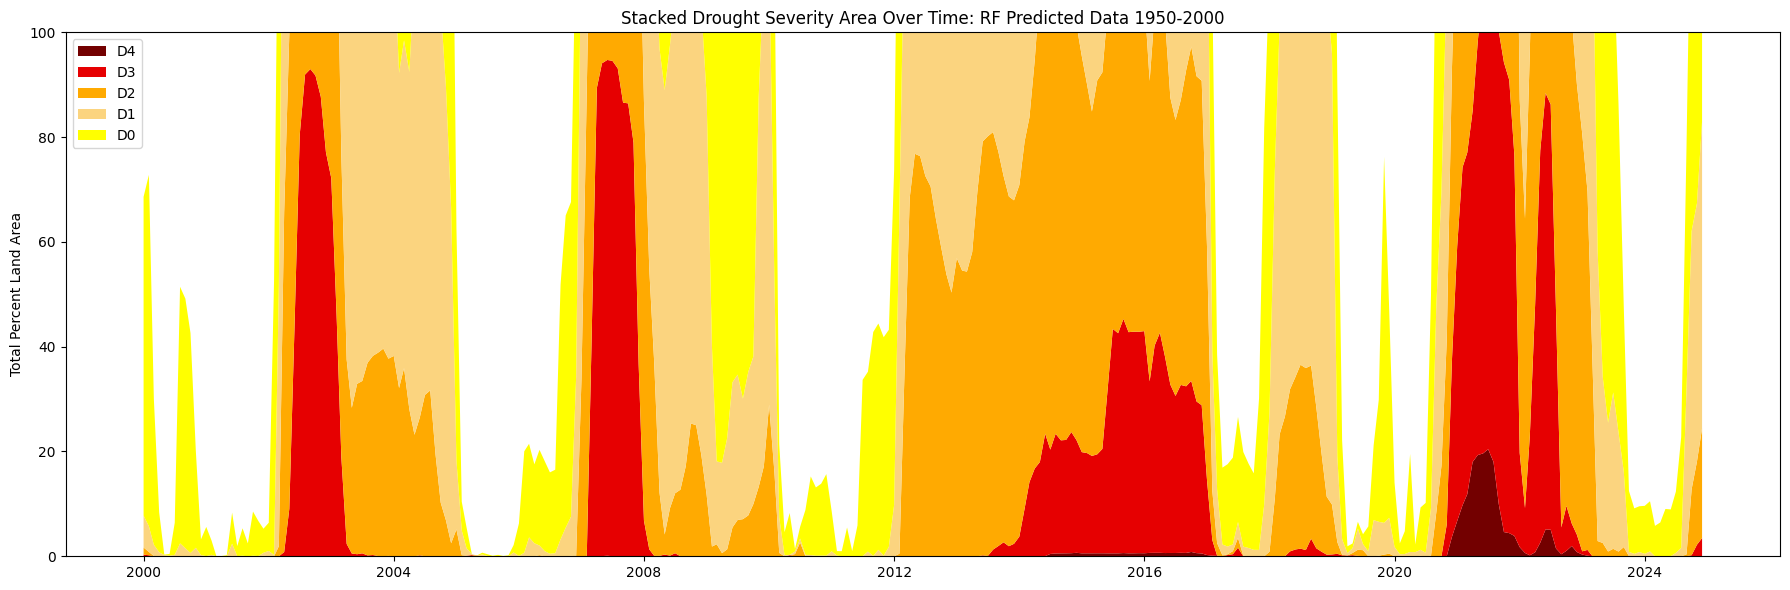

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (replace with your actual path if needed)
df = pd.read_csv('./final_historical.csv')

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])
start_date = '2000-01-01'
end_date = '2024-12-31'
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df = df.loc[mask].reset_index(drop=True)

d0 = df['D0']
d1 = df['D1'] 
d2 = df['D2'] 
d3 = df['D3']
d4 = df['D4'] 


# Plot
plt.figure(figsize=(18, 6))
plt.stackplot(df['date'], d4, d3, d2, d1, d0,
              labels=['D4', 'D3', 'D2', 'D1', 'D0'],
              colors=['#730000', '#e60001', '#ffaa01', '#fbd47f', '#ffff00'])


# Axis and labels
plt.ylabel("Total Percent Land Area")
plt.title("Stacked Drought Severity Area Over Time - Original Historical Data")
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


# Load your data (replace with your actual path if needed)
df = pd.read_csv('historical_predicted_drought_rf_full.csv')

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])
# Filter for 1950 to 2000
start_date = '2000-01-01'
end_date = '2024-12-31'
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df = df.loc[mask].reset_index(drop=True)


d0 = df['D0']
d1 = df['D1'] 
d2 = df['D2'] 
d3 = df['D3']
d4 = df['D4'] 


# Plot
plt.figure(figsize=(18, 6))
# plt.stackplot(df['date'], d0, d1, d2, d3, d4,
#               labels=['D0', 'D1', 'D2', 'D3', 'D4'],
#               colors=['#ffff00', '#fdae61', '#f46d43', '#d73027', '#7f0000'])

plt.stackplot(df['date'], d4, d3, d2, d1, d0,
              labels=['D4', 'D3', 'D2', 'D1', 'D0'],
              colors=['#730000', '#e60001', '#ffaa01', '#fbd47f', '#ffff00'])


# Axis and labels
plt.ylabel("Total Percent Land Area")
plt.title("Stacked Drought Severity Area Over Time: RF Predicted Data 1950-2000")
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


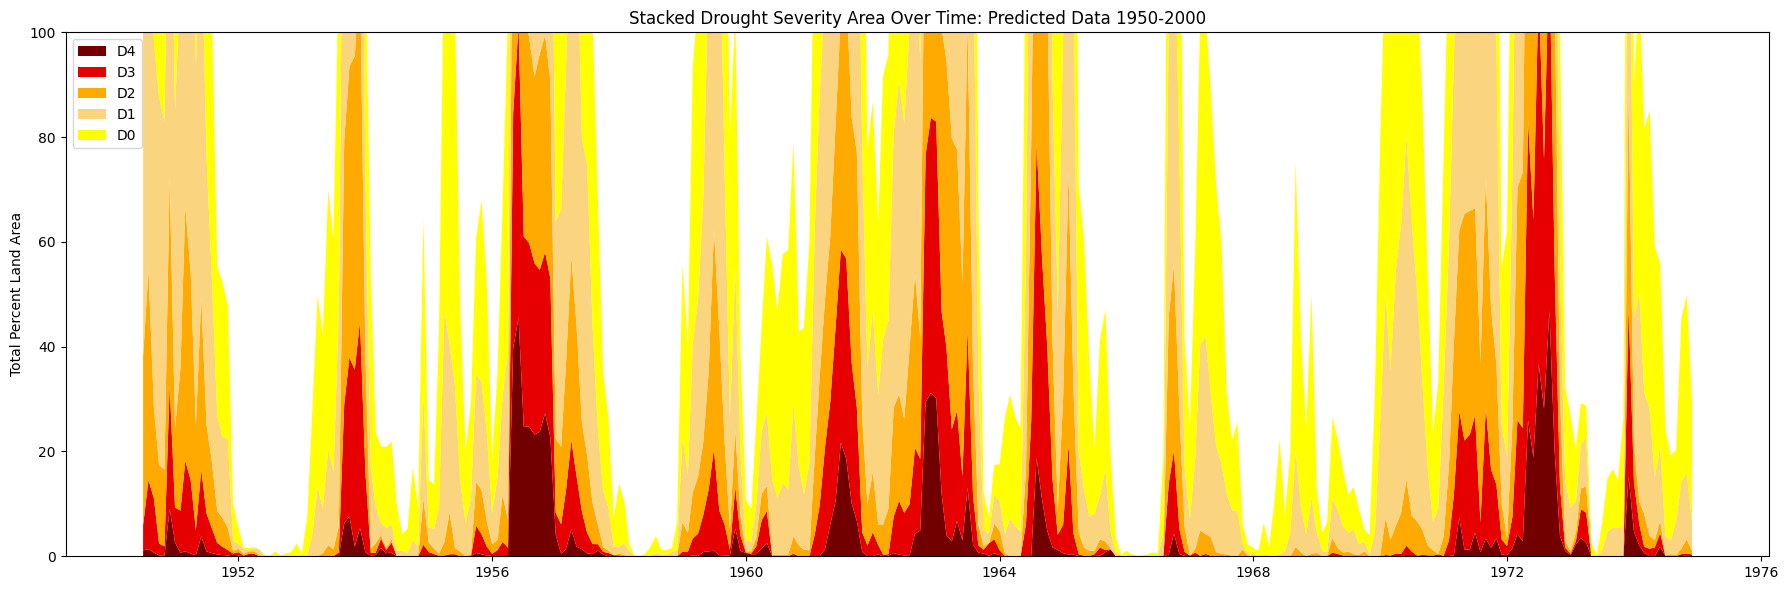

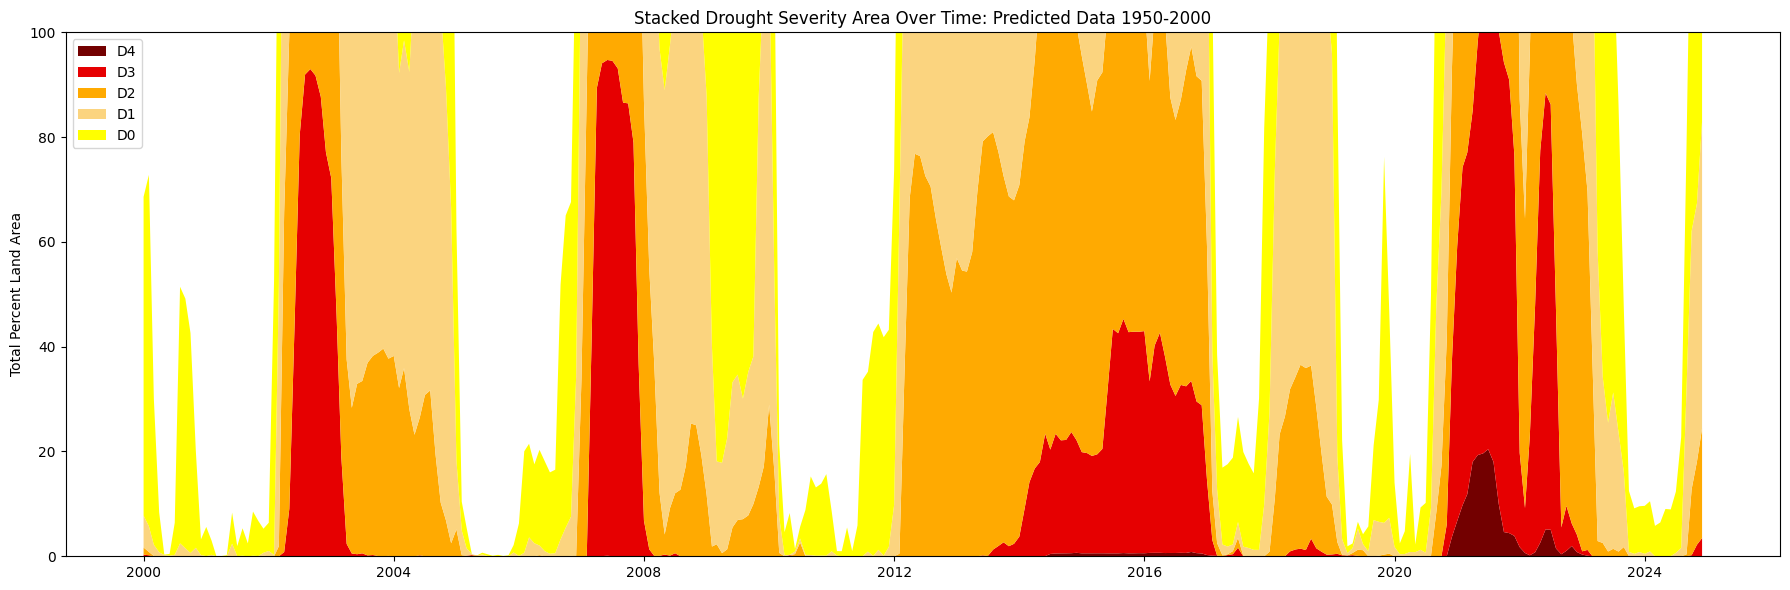

In [34]:
# Load your data (replace with your actual path if needed)
df = pd.read_csv('predicted_drought_rf_full.csv')

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])
# Filter for 1950 to 2000
start_date = '1950-01-01'
end_date = '1974-12-31'
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df = df.loc[mask].reset_index(drop=True)


d0 = df['D0']
d1 = df['D1'] 
d2 = df['D2'] 
d3 = df['D3']
d4 = df['D4'] 


# Plot
plt.figure(figsize=(18, 6))
# plt.stackplot(df['date'], d0, d1, d2, d3, d4,
#               labels=['D0', 'D1', 'D2', 'D3', 'D4'],
#               colors=['#ffff00', '#fdae61', '#f46d43', '#d73027', '#7f0000'])

plt.stackplot(df['date'], d4, d3, d2, d1, d0,
              labels=['D4', 'D3', 'D2', 'D1', 'D0'],
              colors=['#730000', '#e60001', '#ffaa01', '#fbd47f', '#ffff00'])


# Axis and labels
plt.ylabel("Total Percent Land Area")
plt.title("Stacked Drought Severity Area Over Time: Predicted Data 1950-2000")
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
# Load your data (replace with your actual path if needed)
df = pd.read_csv('predicted_drought_rf_full.csv')

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])
# Filter for 1950 to 2000
start_date = '2000-01-01'
end_date = '2024-12-31'
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df = df.loc[mask].reset_index(drop=True)


d0 = df['D0']
d1 = df['D1'] 
d2 = df['D2'] 
d3 = df['D3']
d4 = df['D4'] 


# Plot
plt.figure(figsize=(18, 6))
# plt.stackplot(df['date'], d0, d1, d2, d3, d4,
#               labels=['D0', 'D1', 'D2', 'D3', 'D4'],
#               colors=['#ffff00', '#fdae61', '#f46d43', '#d73027', '#7f0000'])

plt.stackplot(df['date'], d4, d3, d2, d1, d0,
              labels=['D4', 'D3', 'D2', 'D1', 'D0'],
              colors=['#730000', '#e60001', '#ffaa01', '#fbd47f', '#ffff00'])


# Axis and labels
plt.ylabel("Total Percent Land Area")
plt.title("Stacked Drought Severity Area Over Time: Predicted Data 1950-2000")
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Future predicted data: HADGEM 8.5

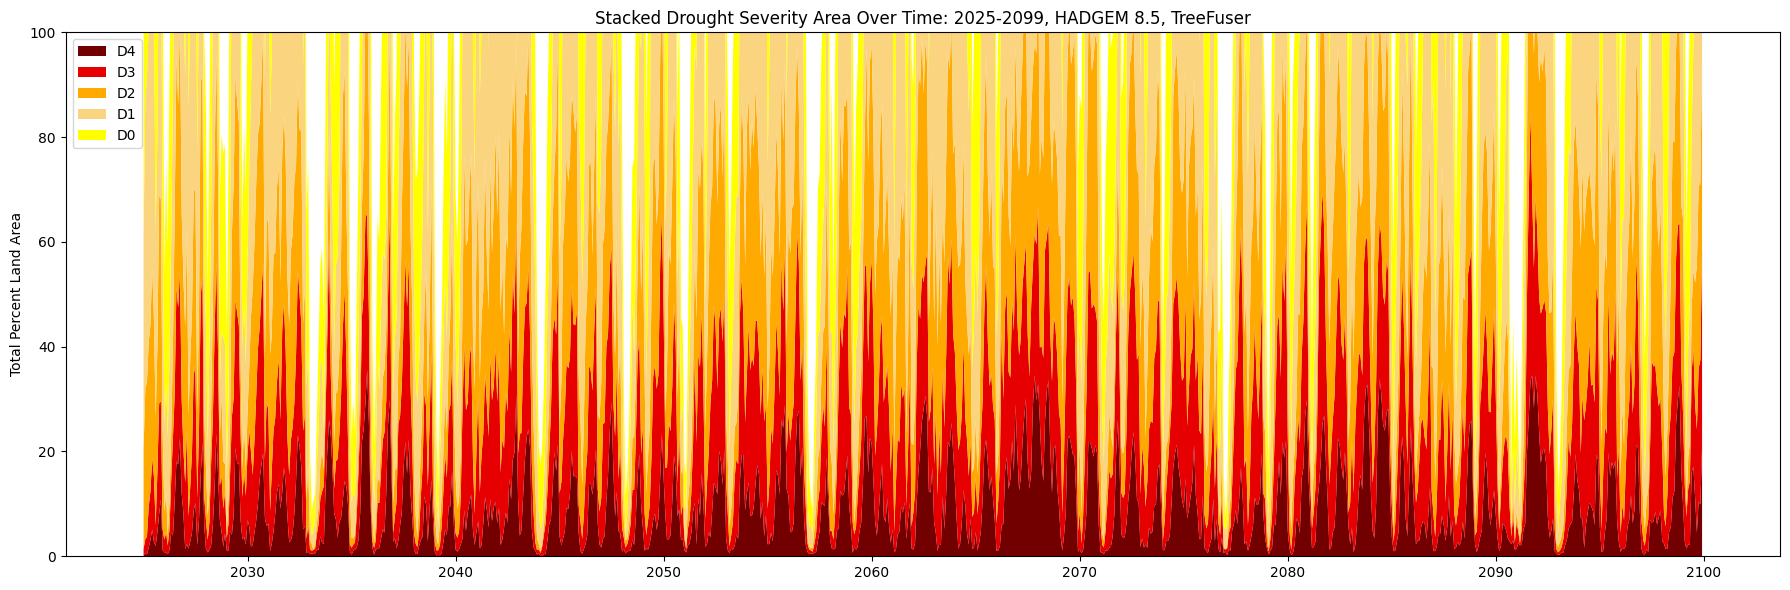

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (replace with your actual path if needed)
df = pd.read_csv('./results/TreeFFuser/future_drought_predictions_treeffuser.csv')

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])
# Filter for 1950 to 2000
start_date = '2025-01-01'
end_date = '2099-12-01'
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df = df.loc[mask].reset_index(drop=True)


d0 = df['D0']
d1 = df['D1'] 
d2 = df['D2'] 
d3 = df['D3']
d4 = df['D4'] 


# Plot
plt.figure(figsize=(18, 6))
# plt.stackplot(df['date'], d0, d1, d2, d3, d4,
#               labels=['D0', 'D1', 'D2', 'D3', 'D4'],
#               colors=['#ffff00', '#fdae61', '#f46d43', '#d73027', '#7f0000'])

plt.stackplot(df['date'], d4, d3, d2, d1, d0,
              labels=['D4', 'D3', 'D2', 'D1', 'D0'],
              colors=['#730000', '#e60001', '#ffaa01', '#fbd47f', '#ffff00'])


# Axis and labels
plt.ylabel("Total Percent Land Area")
plt.title("Stacked Drought Severity Area Over Time: 2025-2099, HADGEM 8.5, TreeFuser")
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


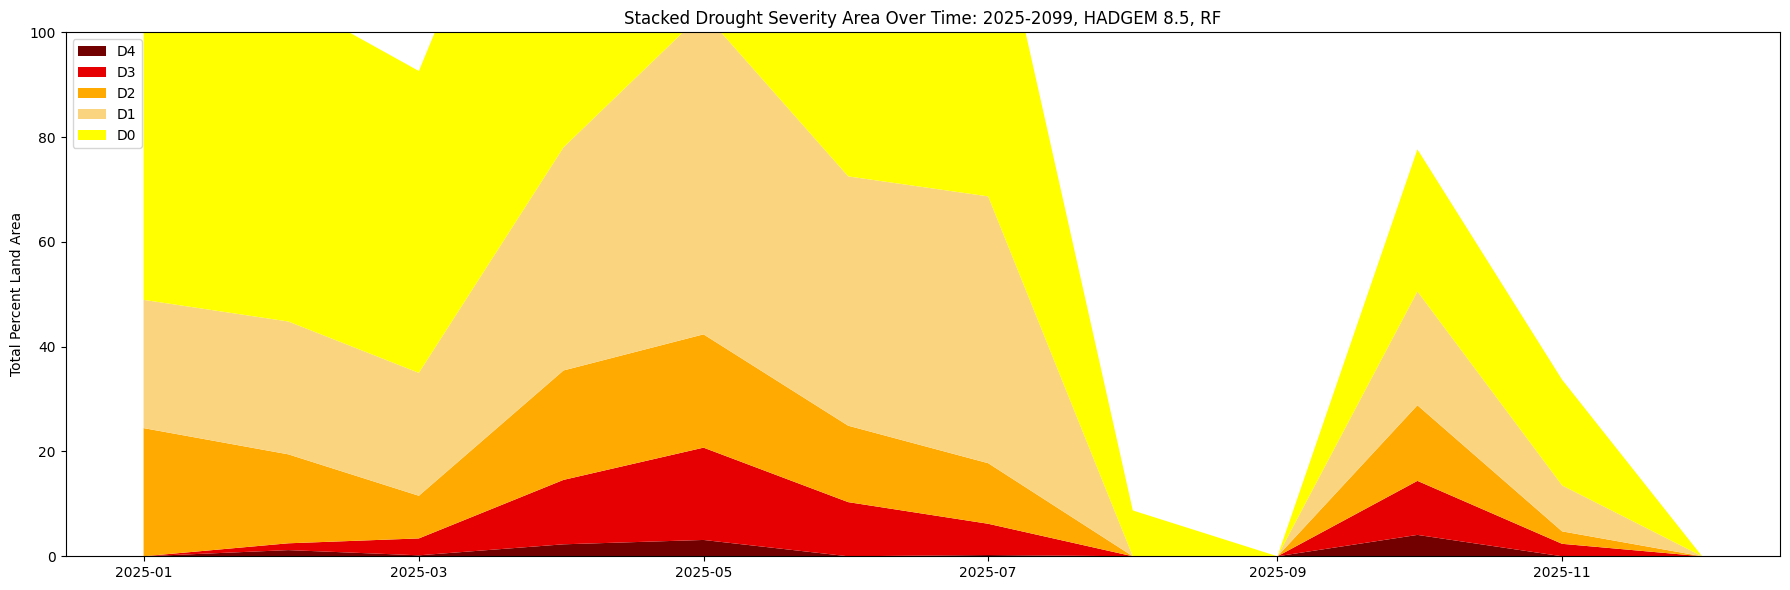

In [ ]:
#RF PREDICTIONS 


import pandas as pd
import matplotlib.pyplot as plt

# Load your data (replace with your actual path if needed)
df = pd.read_csv('./results/RF/future_drought_predictions.csv')

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])
# Filter for 1950 to 2000
start_date = '2025-01-01'
end_date = '2025-12-01'
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df = df.loc[mask].reset_index(drop=True)


d0 = df['D0']
d1 = df['D1'] 
d2 = df['D2'] 
d3 = df['D3']
d4 = df['D4'] 


# Plot
plt.figure(figsize=(18, 6))
# plt.stackplot(df['date'], d0, d1, d2, d3, d4,
#               labels=['D0', 'D1', 'D2', 'D3', 'D4'],
#               colors=['#ffff00', '#fdae61', '#f46d43', '#d73027', '#7f0000'])

plt.stackplot(df['date'], d4, d3, d2, d1, d0,
              labels=['D4', 'D3', 'D2', 'D1', 'D0'],
              colors=['#730000', '#e60001', '#ffaa01', '#fbd47f', '#ffff00'])


# Axis and labels
plt.ylabel("Total Percent Land Area")
plt.title("Stacked Drought Severity Area Over Time: 2025-2099, HADGEM 8.5, RF")
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


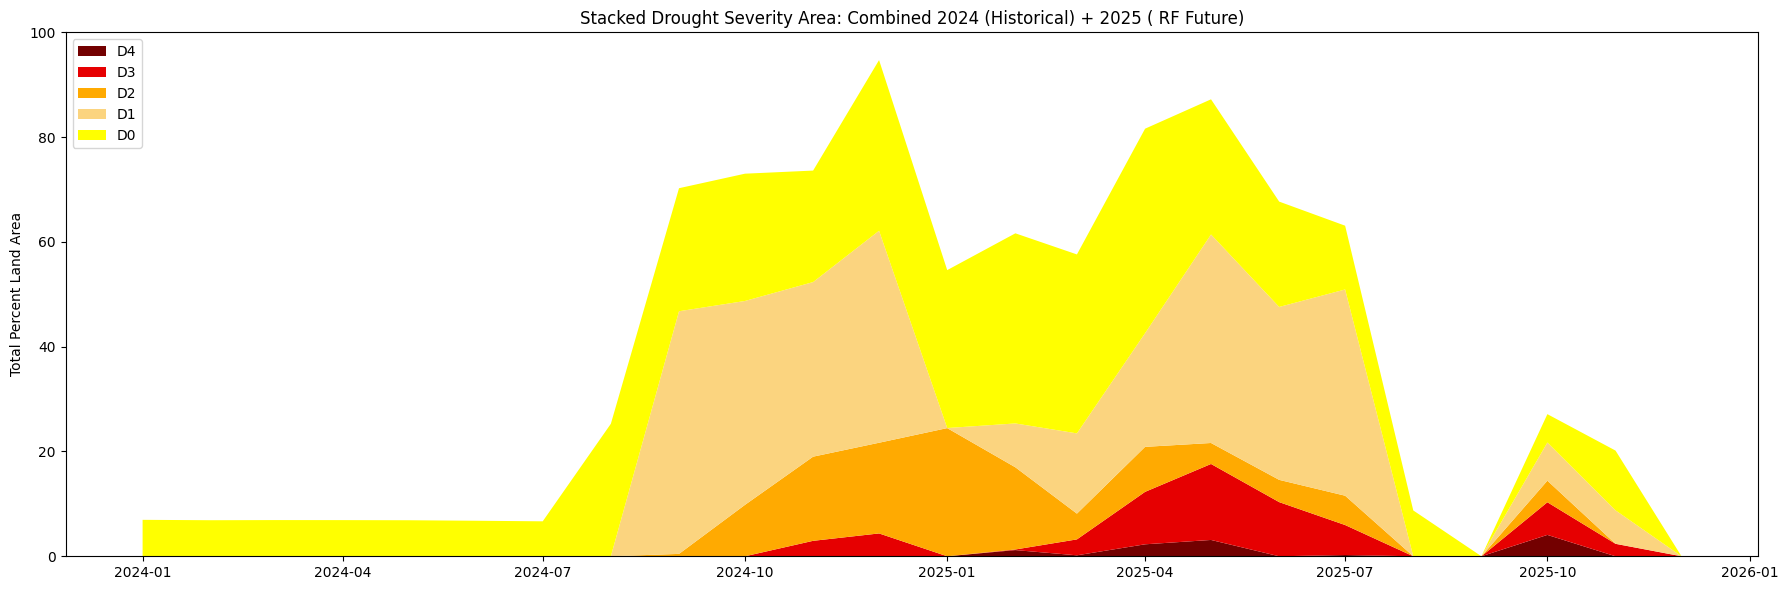

In [17]:
#RF PREDICTIONS

import pandas as pd
import matplotlib.pyplot as plt

# Load historical predictions and future predictions
hist_df = pd.read_csv('./final_historical.csv')
fut_df = pd.read_csv('./results/RF/future_drought_predictions.csv')

# Convert 'date' to datetime
hist_df['date'] = pd.to_datetime(hist_df['date'])
fut_df['date'] = pd.to_datetime(fut_df['date'])

# Filter for only 2024 in historical data
hist_filtered = hist_df[hist_df['date'].dt.year == 2024]

# Filter for only 2025 in future data
fut_filtered = fut_df[(fut_df['date'] >= '2025-01-01') & (fut_df['date'] <= '2025-12-31')]


# Combine into one DataFrame
combined_df = pd.concat([hist_filtered, fut_filtered], ignore_index=True)
combined_df = combined_df.sort_values(by='date').reset_index(drop=True)

# Extract values
d0 = combined_df['D0']
d1 = combined_df['D1']
d2 = combined_df['D2']
d3 = combined_df['D3']
d4 = combined_df['D4']

# Plot
plt.figure(figsize=(18, 6))
plt.stackplot(combined_df['date'], d4, d3 - d4, d2 - d3, d1 - d2, d0 - d1,
              labels=['D4', 'D3', 'D2', 'D1', 'D0'],
              colors=['#730000', '#e60001', '#ffaa01', '#fbd47f', '#ffff00'])

plt.ylabel("Total Percent Land Area")
plt.title("Stacked Drought Severity Area: Combined 2024 (Historical) + 2025 ( RF Future)")
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



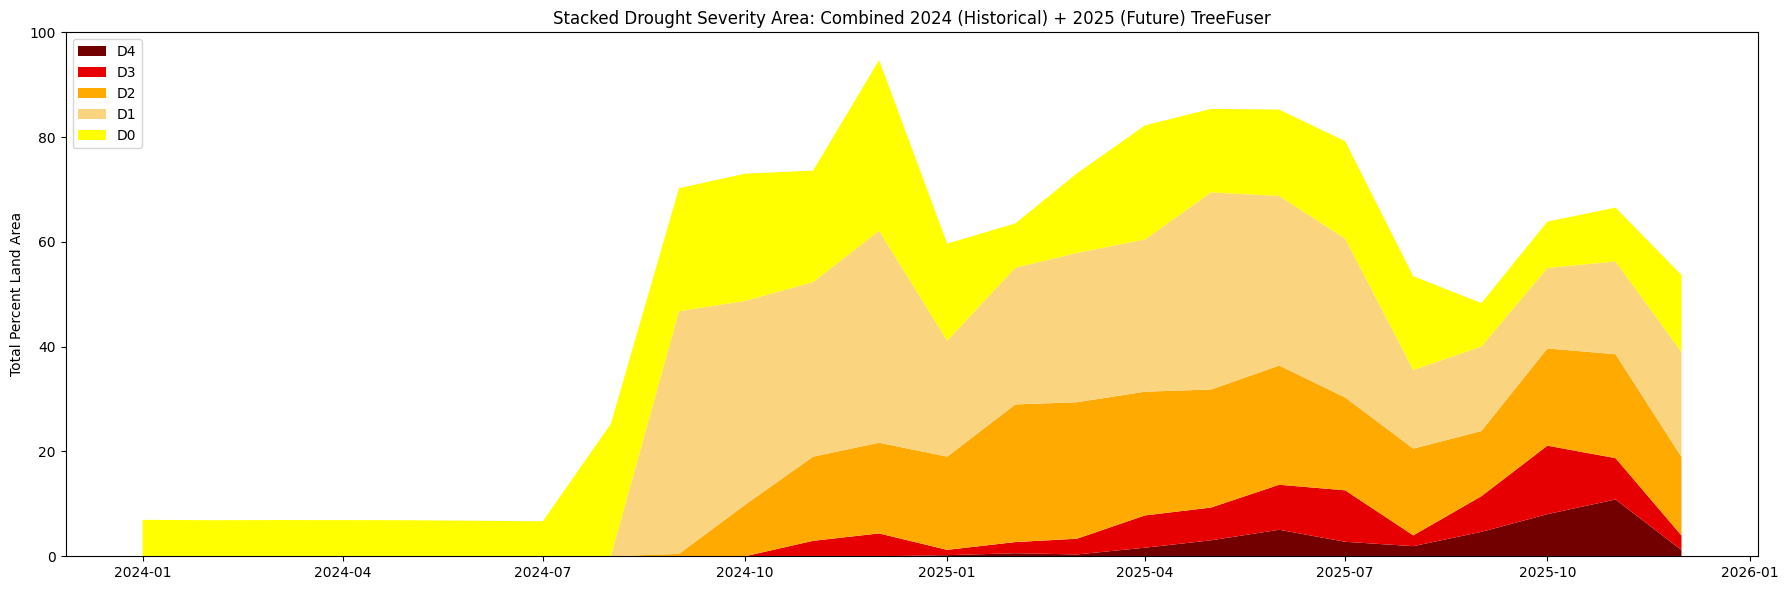

In [ ]:
#TREEFUSER 

import pandas as pd
import matplotlib.pyplot as plt

# Load historical predictions and future predictions
hist_df = pd.read_csv('./final_historical.csv')
fut_df = pd.read_csv('./results/TreeFFuser/future_drought_predictions_treeffuser.csv')

# Convert 'date' to datetime
hist_df['date'] = pd.to_datetime(hist_df['date'])
fut_df['date'] = pd.to_datetime(fut_df['date'])

# Filter for only 2024 in historical data
hist_filtered = hist_df[hist_df['date'].dt.year == 2024]

# Filter for only 2025 in future data
fut_filtered = fut_df[(fut_df['date'] >= '2025-01-01') & (fut_df['date'] <= '2025-12-31')]


# Combine into one DataFrame
combined_df = pd.concat([hist_filtered, fut_filtered], ignore_index=True)
combined_df = combined_df.sort_values(by='date').reset_index(drop=True)

# Extract values
d0 = combined_df['D0']
d1 = combined_df['D1']
d2 = combined_df['D2']
d3 = combined_df['D3']
d4 = combined_df['D4']

# Plot
plt.figure(figsize=(18, 6))
plt.stackplot(combined_df['date'], d4, d3 - d4, d2 - d3, d1 - d2, d0 - d1,
              labels=['D4', 'D3', 'D2', 'D1', 'D0'],
              colors=['#730000', '#e60001', '#ffaa01', '#fbd47f', '#ffff00'])

plt.ylabel("Total Percent Land Area")
plt.title("Stacked Drought Severity Area: Combined 2024 (Historical) + 2025 (Future) TreeFuser")
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



## Improved Treefuser Predictions

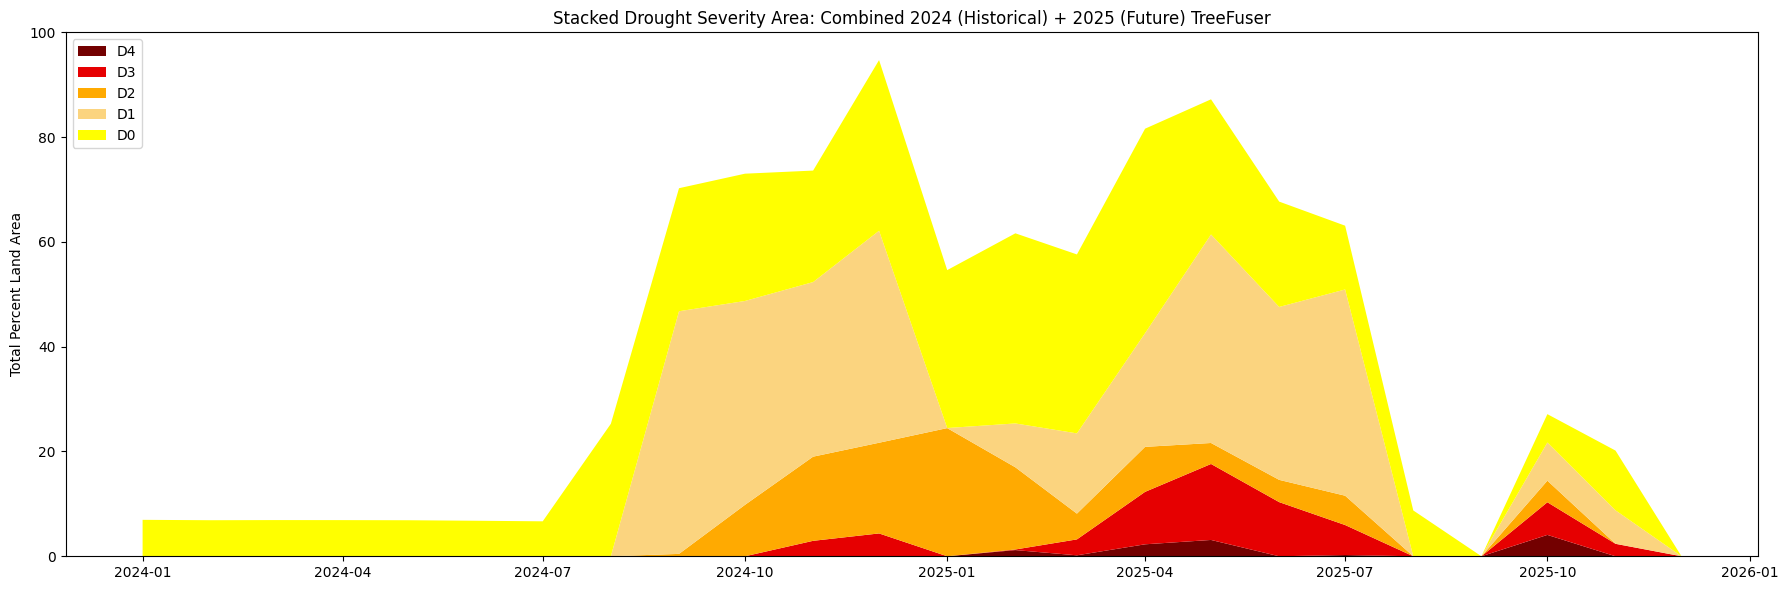

In [16]:
# future_predictions_treeffuser_improved.csv

#TREEFUSER 

import pandas as pd
import matplotlib.pyplot as plt

# Load historical predictions and future predictions
hist_df = pd.read_csv('./final_historical.csv')
fut_df = pd.read_csv('./future_predictions_treeffuser_improved.csv')

# Convert 'date' to datetime
hist_df['date'] = pd.to_datetime(hist_df['date'])
fut_df['date'] = pd.to_datetime(fut_df['date'])

# Filter for only 2024 in historical data
hist_filtered = hist_df[hist_df['date'].dt.year == 2024]

# Filter for only 2025 in future data
fut_filtered = fut_df[(fut_df['date'] >= '2025-01-01') & (fut_df['date'] <= '2025-12-31')]


# Combine into one DataFrame
combined_df = pd.concat([hist_filtered, fut_filtered], ignore_index=True)
combined_df = combined_df.sort_values(by='date').reset_index(drop=True)

# Extract values
d0 = combined_df['D0']
d1 = combined_df['D1']
d2 = combined_df['D2']
d3 = combined_df['D3']
d4 = combined_df['D4']

# Plot
plt.figure(figsize=(18, 6))
plt.stackplot(combined_df['date'], d4, d3 - d4, d2 - d3, d1 - d2, d0 - d1,
              labels=['D4', 'D3', 'D2', 'D1', 'D0'],
              colors=['#730000', '#e60001', '#ffaa01', '#fbd47f', '#ffff00'])

plt.ylabel("Total Percent Land Area")
plt.title("Stacked Drought Severity Area: Combined 2024 (Historical) + 2025 (Future) TreeFuser")
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()




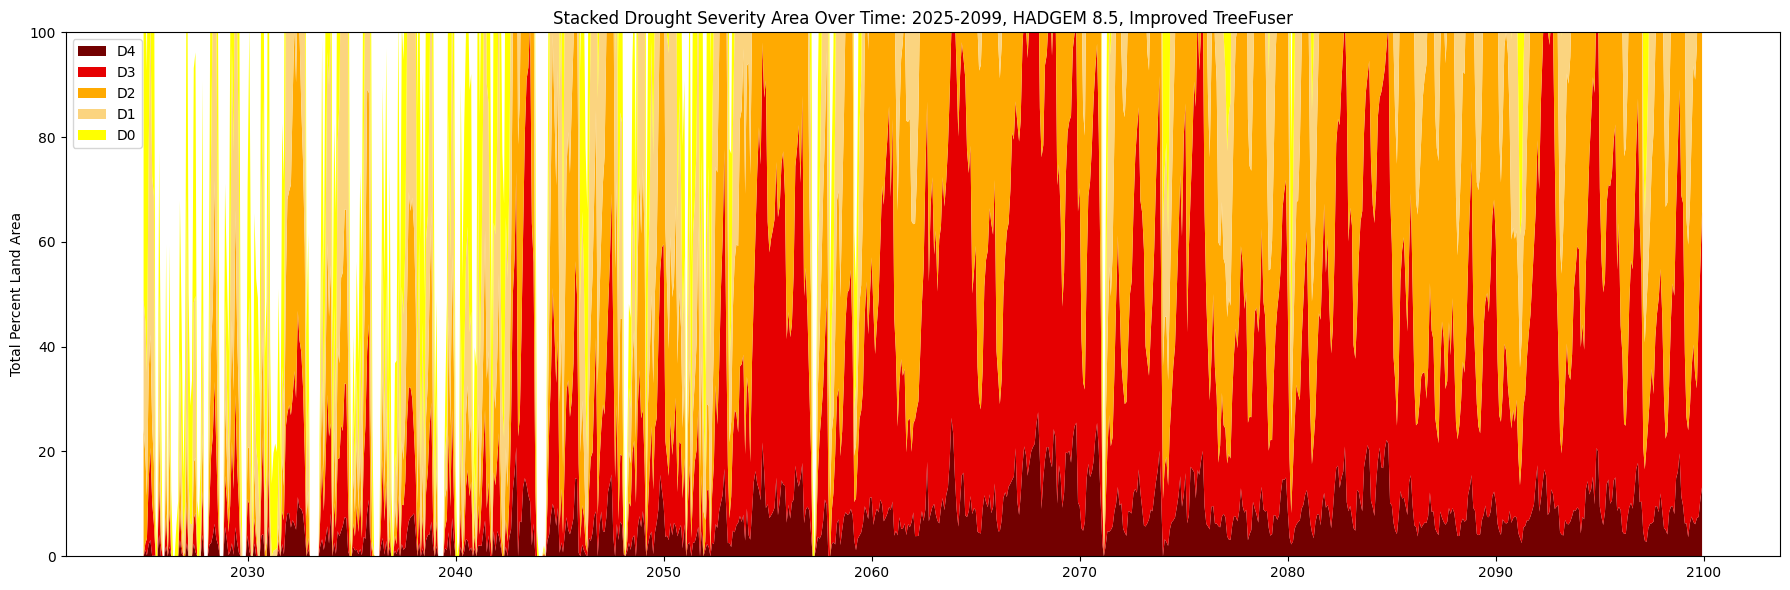

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (replace with your actual path if needed)
df = pd.read_csv('./future_predictions_treeffuser_improved.csv')

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])
# Filter for 1950 to 2000
start_date = '2025-01-01'
end_date = '2099-12-01'
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df = df.loc[mask].reset_index(drop=True)


d0 = df['D0']
d1 = df['D1'] 
d2 = df['D2'] 
d3 = df['D3']
d4 = df['D4'] 


# Plot
plt.figure(figsize=(18, 6))
# plt.stackplot(df['date'], d0, d1, d2, d3, d4,
#               labels=['D0', 'D1', 'D2', 'D3', 'D4'],
#               colors=['#ffff00', '#fdae61', '#f46d43', '#d73027', '#7f0000'])

plt.stackplot(df['date'], d4, d3, d2, d1, d0,
              labels=['D4', 'D3', 'D2', 'D1', 'D0'],
              colors=['#730000', '#e60001', '#ffaa01', '#fbd47f', '#ffff00'])


# Axis and labels
plt.ylabel("Total Percent Land Area")
plt.title("Stacked Drought Severity Area Over Time: 2025-2099, HADGEM 8.5, Improved TreeFuser")
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


## HISTORICAL PREDICTIONS FOR TF 

In [25]:
%pip install treeffuser

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.5 MB/s eta 0:00:00a 0:00:01
  DEPRECATION: Building 'ml-collections' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'ml-collections'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for ml-collections: filename=ml_collections-0.1.1-py3-none-any.whl size=94506 sha256=7325b0d594558b45ce8cb59a11fbf78003b2a8da6905666aca29c388934917f0
  Stored in directory: /Users/audreyleong/Library/Caches/pip/wheels/7b/89/c9/a9b87790789e94aadcfc393c283e3ecd5ab916aed0a31be8fe
Successfully built ml-collections
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [treeffuser]
Note: you may

TreeFFuser successfully imported

========================== LOADING AND PREPARING DATA ==========================
Loaded historical data with 900 rows and 15 columns
Historical data: 900 rows from 1950-01-01 00:00:00 to 2024-12-01 00:00:00

============================= FEATURE ENGINEERING ==============================
After feature engineering: 888 rows remaining
Total number of features: 84

==================== TRAINING MODELS AND MAKING PREDICTIONS ====================

Processing D0...
Training TreeFFuser model for D0...
  Successfully trained model for D0
D0 - MAE: 2.7456, R²: 0.9892


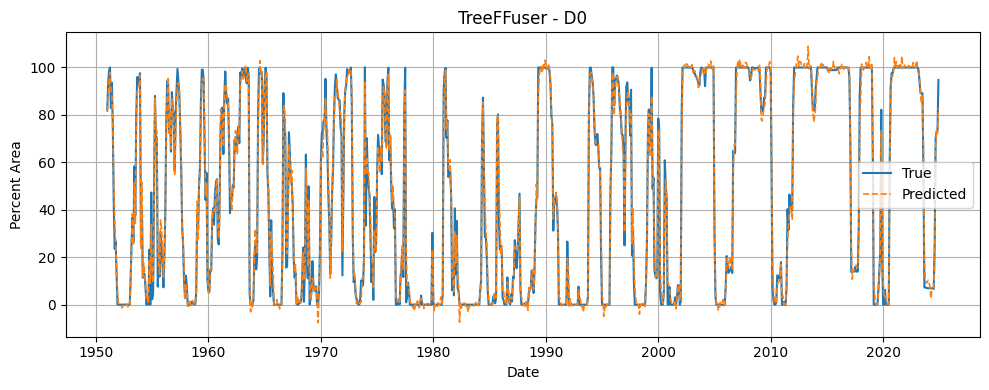


Processing D1...
Training TreeFFuser model for D1...
  Successfully trained model for D1
D1 - MAE: 2.5793, R²: 0.9890


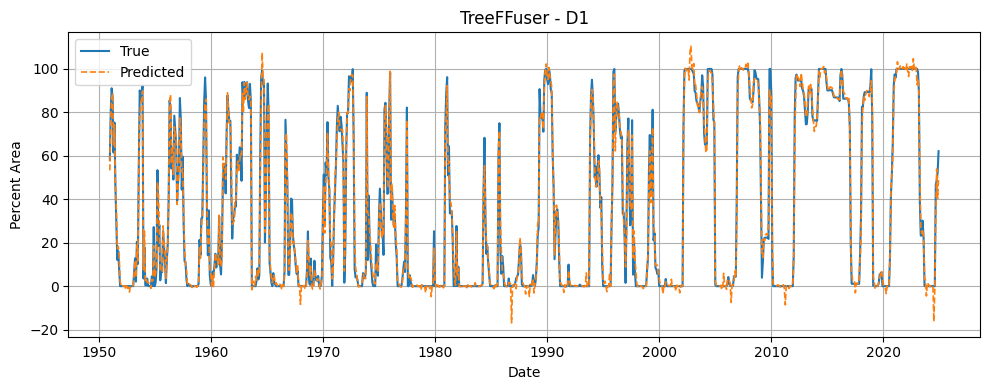


Processing D2...
Training TreeFFuser model for D2...
  Successfully trained model for D2
D2 - MAE: 1.7521, R²: 0.9892


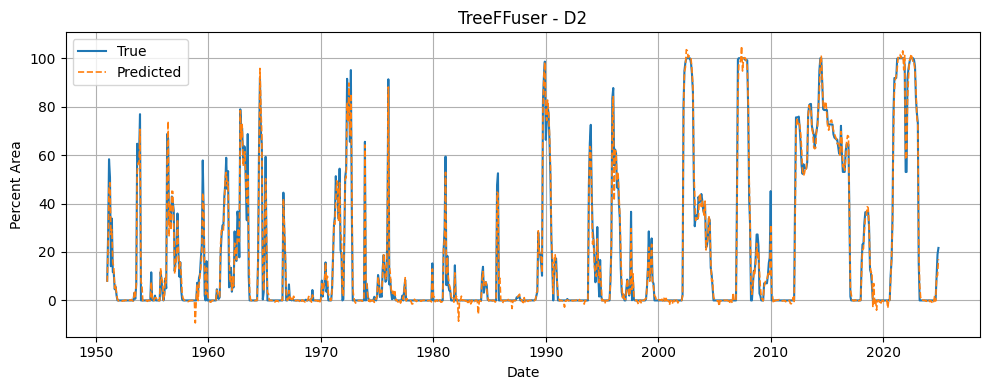


Processing D3...
Training TreeFFuser model for D3...
  Successfully trained model for D3
D3 - MAE: 1.0538, R²: 0.9837


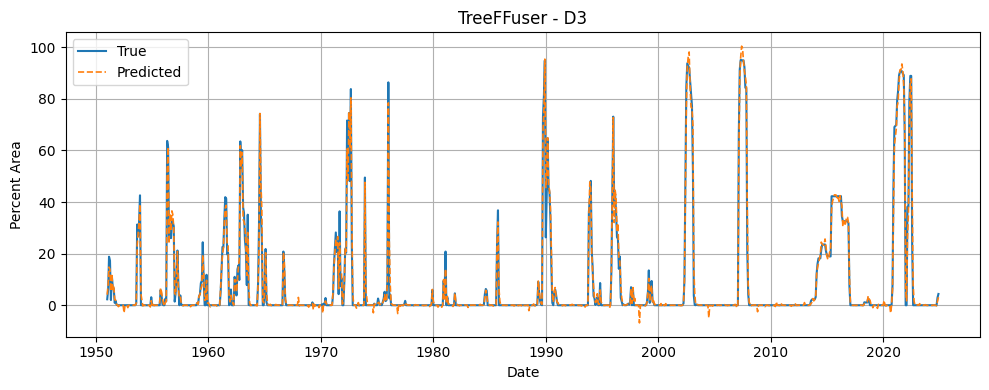


Processing D4...
Training TreeFFuser model for D4...
  Successfully trained model for D4
D4 - MAE: 0.3517, R²: 0.9753


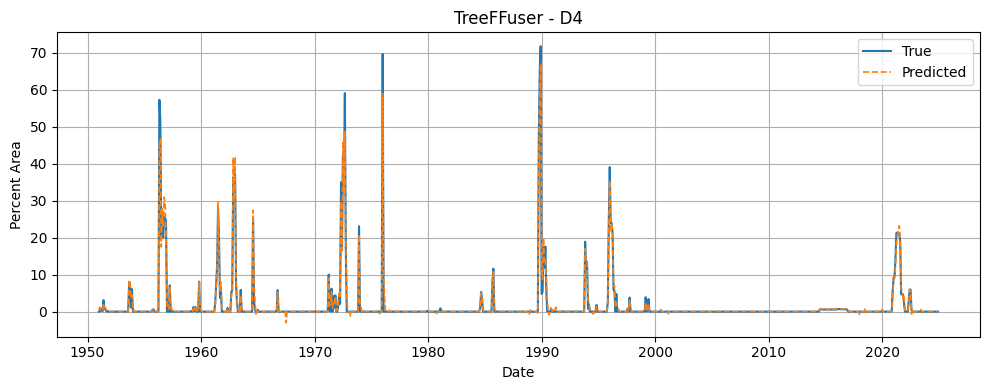


Model Performance Summary:
D0 - MAE: 2.7456, R²: 0.9892
D1 - MAE: 2.5793, R²: 0.9890
D2 - MAE: 1.7521, R²: 0.9892
D3 - MAE: 1.0538, R²: 0.9837
D4 - MAE: 0.3517, R²: 0.9753

Execution time: 54.20 seconds

============================== SAVING PREDICTIONS ==============================
✅ Saved predictions to 'results/historical_predicted_drought_treeffuser.csv'
✅ Displayed stacked area chart of drought predictions


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
import time
import os
import warnings
warnings.filterwarnings('ignore')

# Import TreeFFuser
from treeffuser import Treeffuser
print("TreeFFuser successfully imported")

# Create results directory if it doesn't exist
os.makedirs('results', exist_ok=True)

# Helper function to print section headers
def print_section(title):
    """Print a section header to make output more readable"""
    print("\n" + "="*80)
    print(f" {title} ".center(80, "="))
    print("="*80)

print_section("LOADING AND PREPARING DATA")

# Record start time for performance benchmarking
start_time = time.time()

# Load historical data
historical_df = pd.read_csv('final_historical.csv')
print(f"Loaded historical data with {historical_df.shape[0]} rows and {historical_df.shape[1]} columns")

# Convert dates and ensure sorting
historical_df['date'] = pd.to_datetime(historical_df['date'])
historical_df = historical_df.sort_values('date')

# Filter historical data if needed
min_year = 1950
max_year = 2024  # Extended to include all historical data
historical_df = historical_df[(historical_df['date'].dt.year >= min_year) & 
                              (historical_df['date'].dt.year <= max_year)]

print(f"Historical data: {historical_df.shape[0]} rows from {historical_df['date'].min()} to {historical_df['date'].max()}")

# Extract month and year as separate features
historical_df['month'] = historical_df['date'].dt.month
historical_df['year'] = historical_df['date'].dt.year

# Create seasonal features
historical_df['month_sin'] = np.sin(2 * np.pi * historical_df['month']/12)
historical_df['month_cos'] = np.cos(2 * np.pi * historical_df['month']/12)
historical_df['quarter'] = ((historical_df['month'] - 1) // 3) + 1
for q in range(1, 5):
    historical_df[f'quarter_{q}'] = (historical_df['quarter'] == q).astype(int)

print_section("FEATURE ENGINEERING")

# Define target columns
target_cols = ['D0', 'D1', 'D2', 'D3', 'D4']

# Create lag features similar to your RandomForest approach
def create_lag_features(df, target_cols, lag_periods=[1, 2, 3, 6, 12], window_sizes=[3, 6, 12]):
    """Create lag and rolling features for the target columns"""
    df = df.copy()
    df = df.sort_values('date')
    
    # Create lag features
    for col in target_cols:
        for lag in lag_periods:
            df[f'{col}_lag_{lag}'] = df[col].shift(lag)
    
    # Create rolling statistics
    for col in target_cols:
        for window in window_sizes:
            df[f'{col}_roll_mean_{window}'] = df[col].rolling(window=window, min_periods=1).mean()
            df[f'{col}_roll_std_{window}'] = df[col].rolling(window=window, min_periods=1).std()
    
    # Create meteorological features
    for col in ['airtemp', 'rainfall', 'sm']:
        for window in window_sizes:
            df[f'{col}_roll_{window}'] = df[col].rolling(window=window, min_periods=1).mean()
    
    # Create interaction features
    df['temp_rain_ratio'] = df['airtemp'] / (df['rainfall'] + 0.1)  # Avoid division by zero
    df['sm_runoff_ratio'] = df['sm'] / (df['runoff'] + 0.1)
    
    return df

# Apply feature engineering
lag_periods = [1, 2, 3, 6, 12]
window_sizes = [3, 6, 12]
historical_df_features = create_lag_features(historical_df, target_cols, lag_periods, window_sizes)

# Drop NaN values resulting from lag and rolling features
historical_df_features = historical_df_features.dropna().reset_index(drop=True)
print(f"After feature engineering: {historical_df_features.shape[0]} rows remaining")

# Define feature columns (excluding targets and date)
exclude_cols = target_cols + ['date']
feature_cols = [col for col in historical_df_features.columns if col not in exclude_cols]

print(f"Total number of features: {len(feature_cols)}")

print_section("TRAINING MODELS AND MAKING PREDICTIONS")

# Function to train TreeFFuser model
def train_treeffuser_model(X, y, col_name):
    """Train a TreeFFuser model with proper handling of data types"""
    print(f"Training TreeFFuser model for {col_name}...")
    
    # Make sure X and y are numpy arrays
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values
    
    # Make sure y is 2D for TreeFFuser (reshape if needed)
    if len(y.shape) == 1:
        y = y.reshape(-1, 1)
    
    # Create and train TreeFFuser model
    try:
        model = Treeffuser(n_estimators=100, seed=42)
        model.fit(X, y)
        print(f"  Successfully trained model for {col_name}")
        return model
    except Exception as e:
        print(f"  Error training TreeFFuser model: {str(e)}")
        # Fall back to RandomForest if TreeFFuser fails
        from sklearn.ensemble import RandomForestRegressor
        print("  Falling back to RandomForest model")
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        
        # Convert y back to 1D for RandomForest if needed
        if len(y.shape) > 1 and y.shape[1] == 1:
            y = y.ravel()
            
        rf_model.fit(X, y)
        return rf_model

# Prepare data, train models, and make predictions for each target
models = {}
scalers = {}
predictions = []
results = {}

X = historical_df_features[feature_cols]
y_data = historical_df_features[target_cols]

for i, col in enumerate(target_cols):
    print(f"\nProcessing {col}...")
    
    # Prepare data
    y = y_data[col]
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Train model
    model = train_treeffuser_model(X_scaled, y, col)
    
    # Make predictions
    if isinstance(model, Treeffuser):
        # For TreeFFuser: use sample mean
        samples = model.sample(X_scaled, n_samples=100)
        y_pred = samples.mean(axis=0)
        # If y_pred is 2D with one column, convert to 1D
        if len(y_pred.shape) > 1 and y_pred.shape[1] == 1:
            y_pred = y_pred.ravel()
    else:
        # For RandomForest fallback
        y_pred = model.predict(X_scaled)
    
    # Calculate metrics
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    
    # Store results
    results[col] = {'R2': r2, 'MAE': mae}
    predictions.append(y_pred)
    
    # Store model and scaler for potential reuse
    models[col] = model
    scalers[col] = scaler
    
    print(f"{col} - MAE: {mae:.4f}, R²: {r2:.4f}")
    
    # Plot true vs predicted
    plt.figure(figsize=(10, 4))
    plt.plot(historical_df_features['date'], y, label='True', linewidth=1.5)
    plt.plot(historical_df_features['date'], y_pred, label='Predicted', linewidth=1.2, linestyle='--')
    plt.title(f"TreeFFuser - {col}")
    plt.xlabel("Date")
    plt.ylabel("Percent Area")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Print overall results
print("\nModel Performance Summary:")
for col in target_cols:
    print(f"{col} - MAE: {results[col]['MAE']:.4f}, R²: {results[col]['R2']:.4f}")

# Calculate execution time
execution_time = time.time() - start_time
print(f"\nExecution time: {execution_time:.2f} seconds")

print_section("SAVING PREDICTIONS")

# Create DataFrame with predictions
pred_df = pd.DataFrame(np.array(predictions).T, columns=target_cols)
pred_df.insert(0, 'date', historical_df_features['date'])

# Save predictions to CSV
output_file = 'results/historical_predicted_drought_treeffuser.csv'
pred_df.to_csv(output_file, index=False)
print(f"✅ Saved predictions to '{output_file}'")

# # Create a stacked area chart of predictions
# plt.figure(figsize=(12, 6))
# plt.stackplot(pred_df['date'], 
#               pred_df['D0'], 
#               pred_df['D1'], 
#               pred_df['D2'],
#               pred_df['D3'],
#               pred_df['D4'],
#               labels=['D0', 'D1', 'D2', 'D3', 'D4'],
#               alpha=0.7)
# plt.title('Predicted Drought Conditions (TreeFFuser Model)')
# plt.xlabel('Date')
# plt.ylabel('Percentage Area')
# plt.legend(loc='upper left')
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()

print("✅ Displayed stacked area chart of drought predictions")

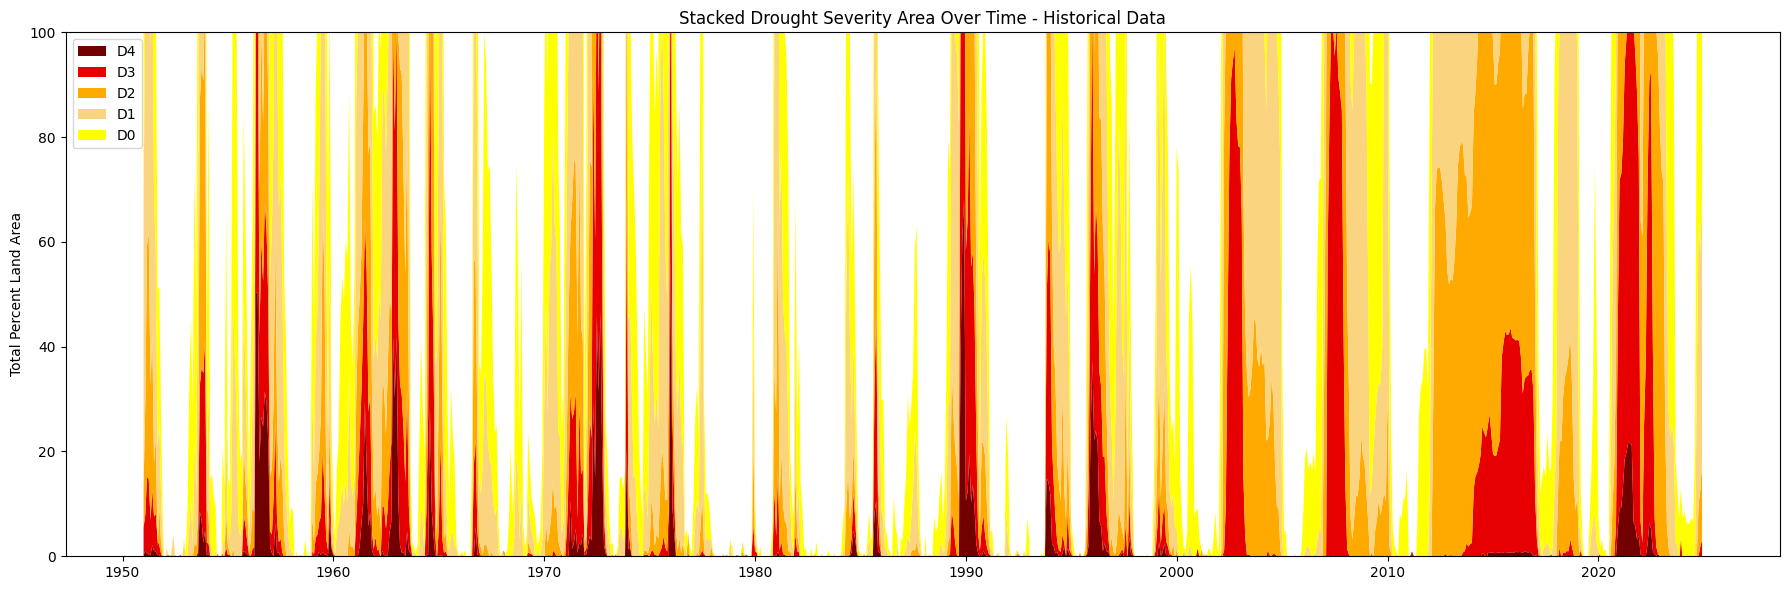

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (replace with your actual path if needed)
df = pd.read_csv('./results/historical_predicted_drought_treeffuser.csv')

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

d0 = df['D0']
d1 = df['D1'] 
d2 = df['D2'] 
d3 = df['D3']
d4 = df['D4'] 


# Plot
plt.figure(figsize=(18, 6))
plt.stackplot(df['date'], d4, d3, d2, d1, d0,
              labels=['D4', 'D3', 'D2', 'D1', 'D0'],
              colors=['#730000', '#e60001', '#ffaa01', '#fbd47f', '#ffff00'])


# Axis and labels
plt.ylabel("Total Percent Land Area")
plt.title("Stacked Drought Severity Area Over Time - Historical Data")
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


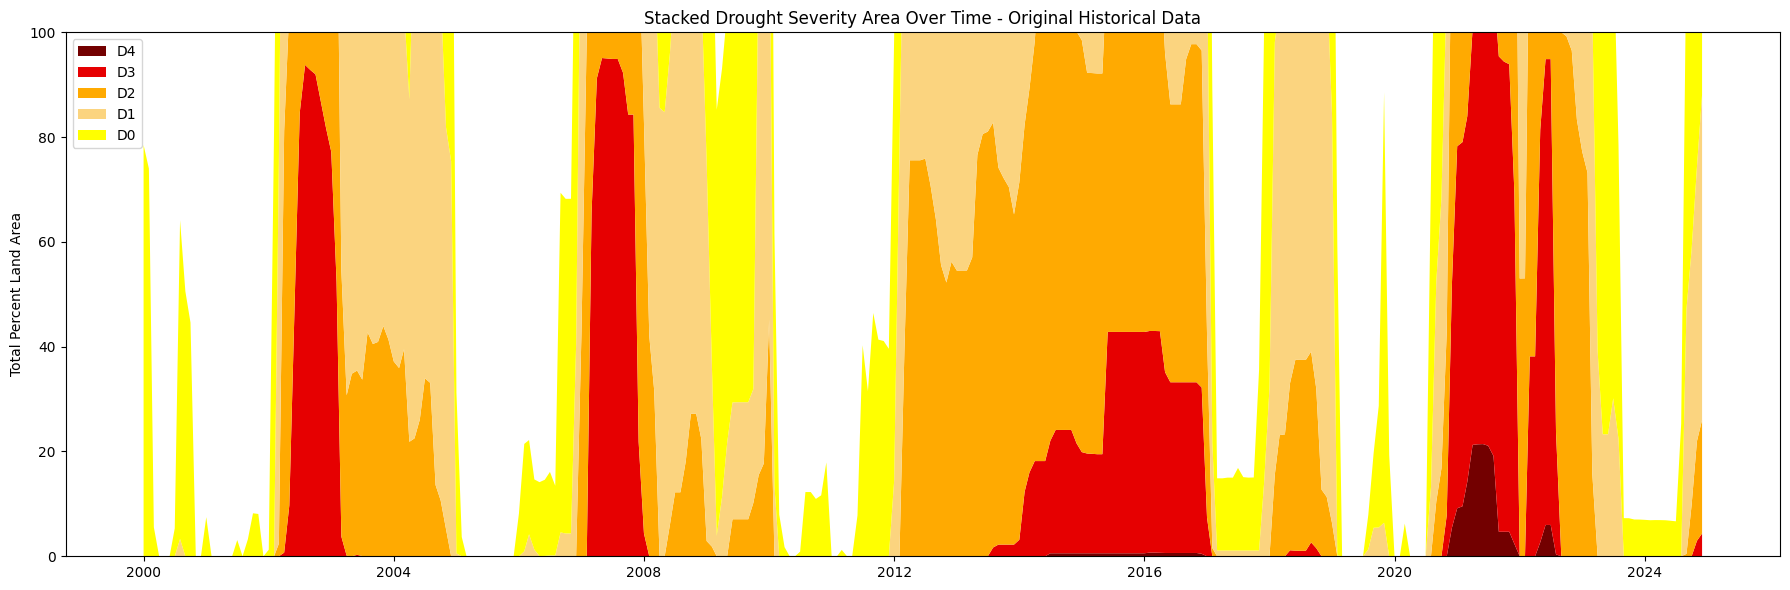

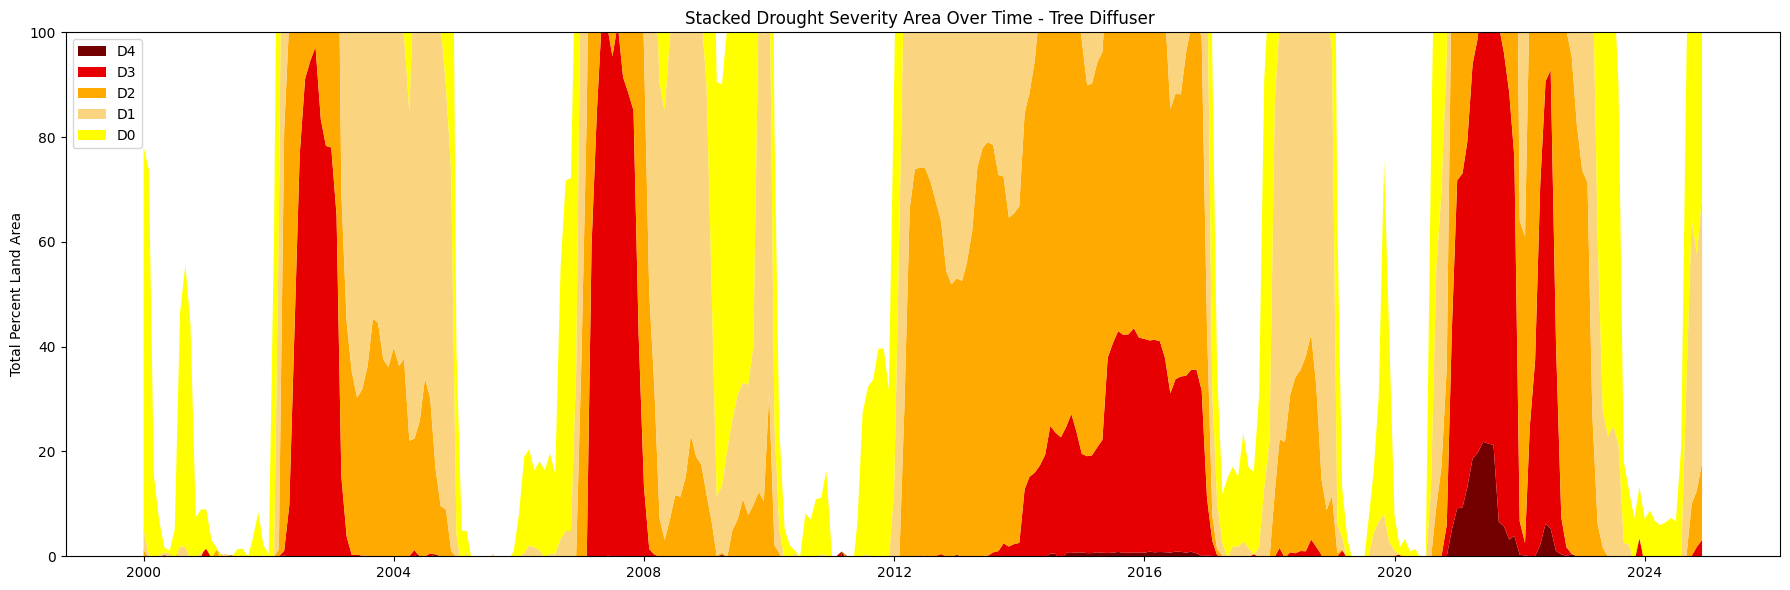

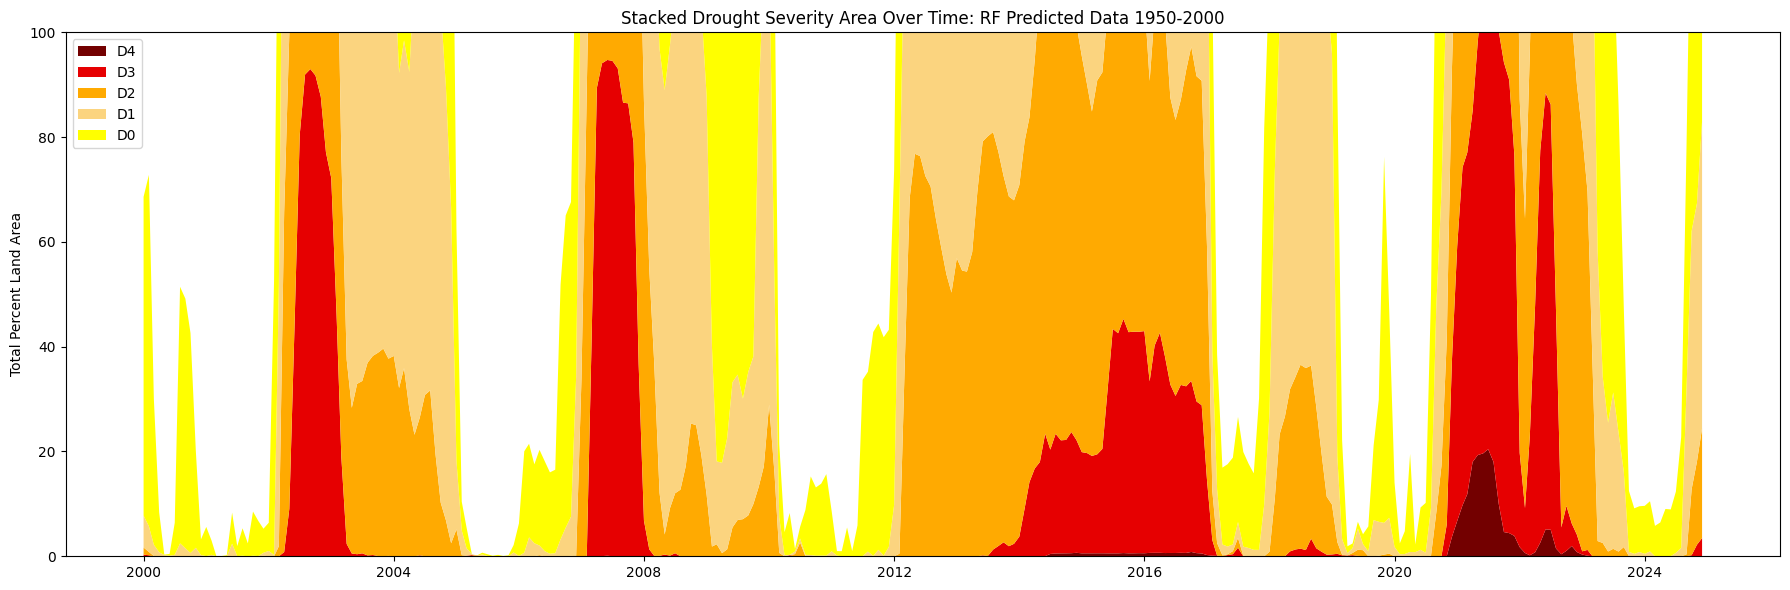

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (replace with your actual path if needed)
df = pd.read_csv('./final_historical.csv')

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])
start_date = '2000-01-01'
end_date = '2024-12-31'
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df = df.loc[mask].reset_index(drop=True)

d0 = df['D0']
d1 = df['D1'] 
d2 = df['D2'] 
d3 = df['D3']
d4 = df['D4'] 


# Plot
plt.figure(figsize=(18, 6))
plt.stackplot(df['date'], d4, d3, d2, d1, d0,
              labels=['D4', 'D3', 'D2', 'D1', 'D0'],
              colors=['#730000', '#e60001', '#ffaa01', '#fbd47f', '#ffff00'])


# Axis and labels
plt.ylabel("Total Percent Land Area")
plt.title("Stacked Drought Severity Area Over Time - Original Historical Data")
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 
# Load your data (replace with your actual path if needed)
df = pd.read_csv('./results/historical_predicted_drought_treeffuser.csv')

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])
start_date = '2000-01-01'
end_date = '2024-12-31'
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df = df.loc[mask].reset_index(drop=True)

d0 = df['D0']
d1 = df['D1'] 
d2 = df['D2'] 
d3 = df['D3']
d4 = df['D4'] 


# Plot
plt.figure(figsize=(18, 6))
plt.stackplot(df['date'], d4, d3, d2, d1, d0,
              labels=['D4', 'D3', 'D2', 'D1', 'D0'],
              colors=['#730000', '#e60001', '#ffaa01', '#fbd47f', '#ffff00'])


# Axis and labels
plt.ylabel("Total Percent Land Area")
plt.title("Stacked Drought Severity Area Over Time - Tree Diffuser ")
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Load your data (replace with your actual path if needed)
df = pd.read_csv('historical_predicted_drought_rf_full.csv')

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])
# Filter for 1950 to 2000
start_date = '2000-01-01'
end_date = '2024-12-31'
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df = df.loc[mask].reset_index(drop=True)


d0 = df['D0']
d1 = df['D1'] 
d2 = df['D2'] 
d3 = df['D3']
d4 = df['D4'] 


# Plot
plt.figure(figsize=(18, 6))
# plt.stackplot(df['date'], d0, d1, d2, d3, d4,
#               labels=['D0', 'D1', 'D2', 'D3', 'D4'],
#               colors=['#ffff00', '#fdae61', '#f46d43', '#d73027', '#7f0000'])

plt.stackplot(df['date'], d4, d3, d2, d1, d0,
              labels=['D4', 'D3', 'D2', 'D1', 'D0'],
              colors=['#730000', '#e60001', '#ffaa01', '#fbd47f', '#ffff00'])


# Axis and labels
plt.ylabel("Total Percent Land Area")
plt.title("Stacked Drought Severity Area Over Time: RF Predicted Data 1950-2000")
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


## OG TREFFUSER Historical Predictions


========================== LOADING AND PREPARING DATA ==========================
Historical data: 900 rows from 1950-01-01 00:00:00 to 2024-12-01 00:00:00
Training data: 612 rows from 1950-01-01 00:00:00 to 2000-12-01 00:00:00

============================= FEATURE ENGINEERING ==============================

Target variable statistics:
D0: min=0.00, max=100.10, mean=36.71, median=22.90
D1: min=0.00, max=100.00, mean=25.57, median=6.70
D2: min=0.00, max=98.60, mean=11.57, median=0.00
D3: min=0.00, max=94.90, mean=6.20, median=0.00
D4: min=0.00, max=71.80, mean=2.32, median=0.00
Training data after feature engineering: 612 rows
Total number of features: 35
Base features: 8
Seasonal features: 2
Derived features: 25

========================== TRAINING TREEFFUSER MODELS ==========================
Training TreeFFuser model for D4...
Training TreeFFuser model for D0...
Training TreeFFuser model for D2...
Training TreeFFuser model for D1...
Training TreeFFuser model for D3...


/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/treeffuser/_base_tabular_diffusion.py:110: CastFloat32Warning: Input array is not float32; it has been recast to float32.
  X = _check_array(X)
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/treeffuser/_base_tabular_diffusion.py:110: CastFloat32Warning: Input array is not float32; it has been recast to float32.
  X = _check_array(X)
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/treeffuser/_base_tabular_diffusion.py:113: CastFloat32Warning: Input array is not float32; it has been recast to float32.
  y = _check_array(y)
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/treeffuser/_base_tabular_diffusion.py:113: CastFloat32Warning: Input array is not float32; it has been recast to float32.
  y = _check_array(y)
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/treeffuser/_base_tabular_diffusion.py:110: CastFloat32Warning: Input array is not fl

  Successfully trained with n_estimators and seed parameters


/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/treeffuser/_base_tabular_diffusion.py:110: CastFloat32Warning: Input array is not float32; it has been recast to float32.
  X = _check_array(X)
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid 

  Successfully trained with n_estimators and seed parameters


/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have v

  Successfully trained with n_estimators and seed parameters


/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have v

  Successfully trained with n_estimators and seed parameters
  Successfully trained with n_estimators and seed parameters


/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have v

Training metrics for D4:
  R² score: 0.8723
  MAE: 1.0378


/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have v

Training metrics for D2:
  R² score: 0.9492
  MAE: 2.5831


/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have v

Training metrics for D1:
  R² score: 0.9550
  MAE: 3.7956


/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have v

Training metrics for D3:
  R² score: 0.9446
  MAE: 1.6379


/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have v

Training metrics for D0:
  R² score: 0.9608
  MAE: 4.7020

================ MAKING HISTORICAL PREDICTIONS WITH TREEFFUSER =================

Making historical predictions with TreeFFuser...
Rows after feature engineering: 900
Processing batch: rows 0 to 49...
Processing batch: rows 50 to 99...
Processing batch: rows 100 to 149...
Processing batch: rows 150 to 199...
Processing batch: rows 200 to 249...
Processing batch: rows 250 to 299...
Processing batch: rows 300 to 349...
Processing batch: rows 350 to 399...
Processing batch: rows 400 to 449...
Processing batch: rows 450 to 499...
Processing batch: rows 500 to 549...
Processing batch: rows 550 to 599...
Processing batch: rows 600 to 649...
Processing batch: rows 650 to 699...
Processing batch: rows 700 to 749...
Processing batch: rows 750 to 799...
Processing batch: rows 800 to 849...
Processing batch: rows 850 to 899...
Historical predictions complete
Predictions saved to 'treeffuser_historical_predictions.csv'

===================

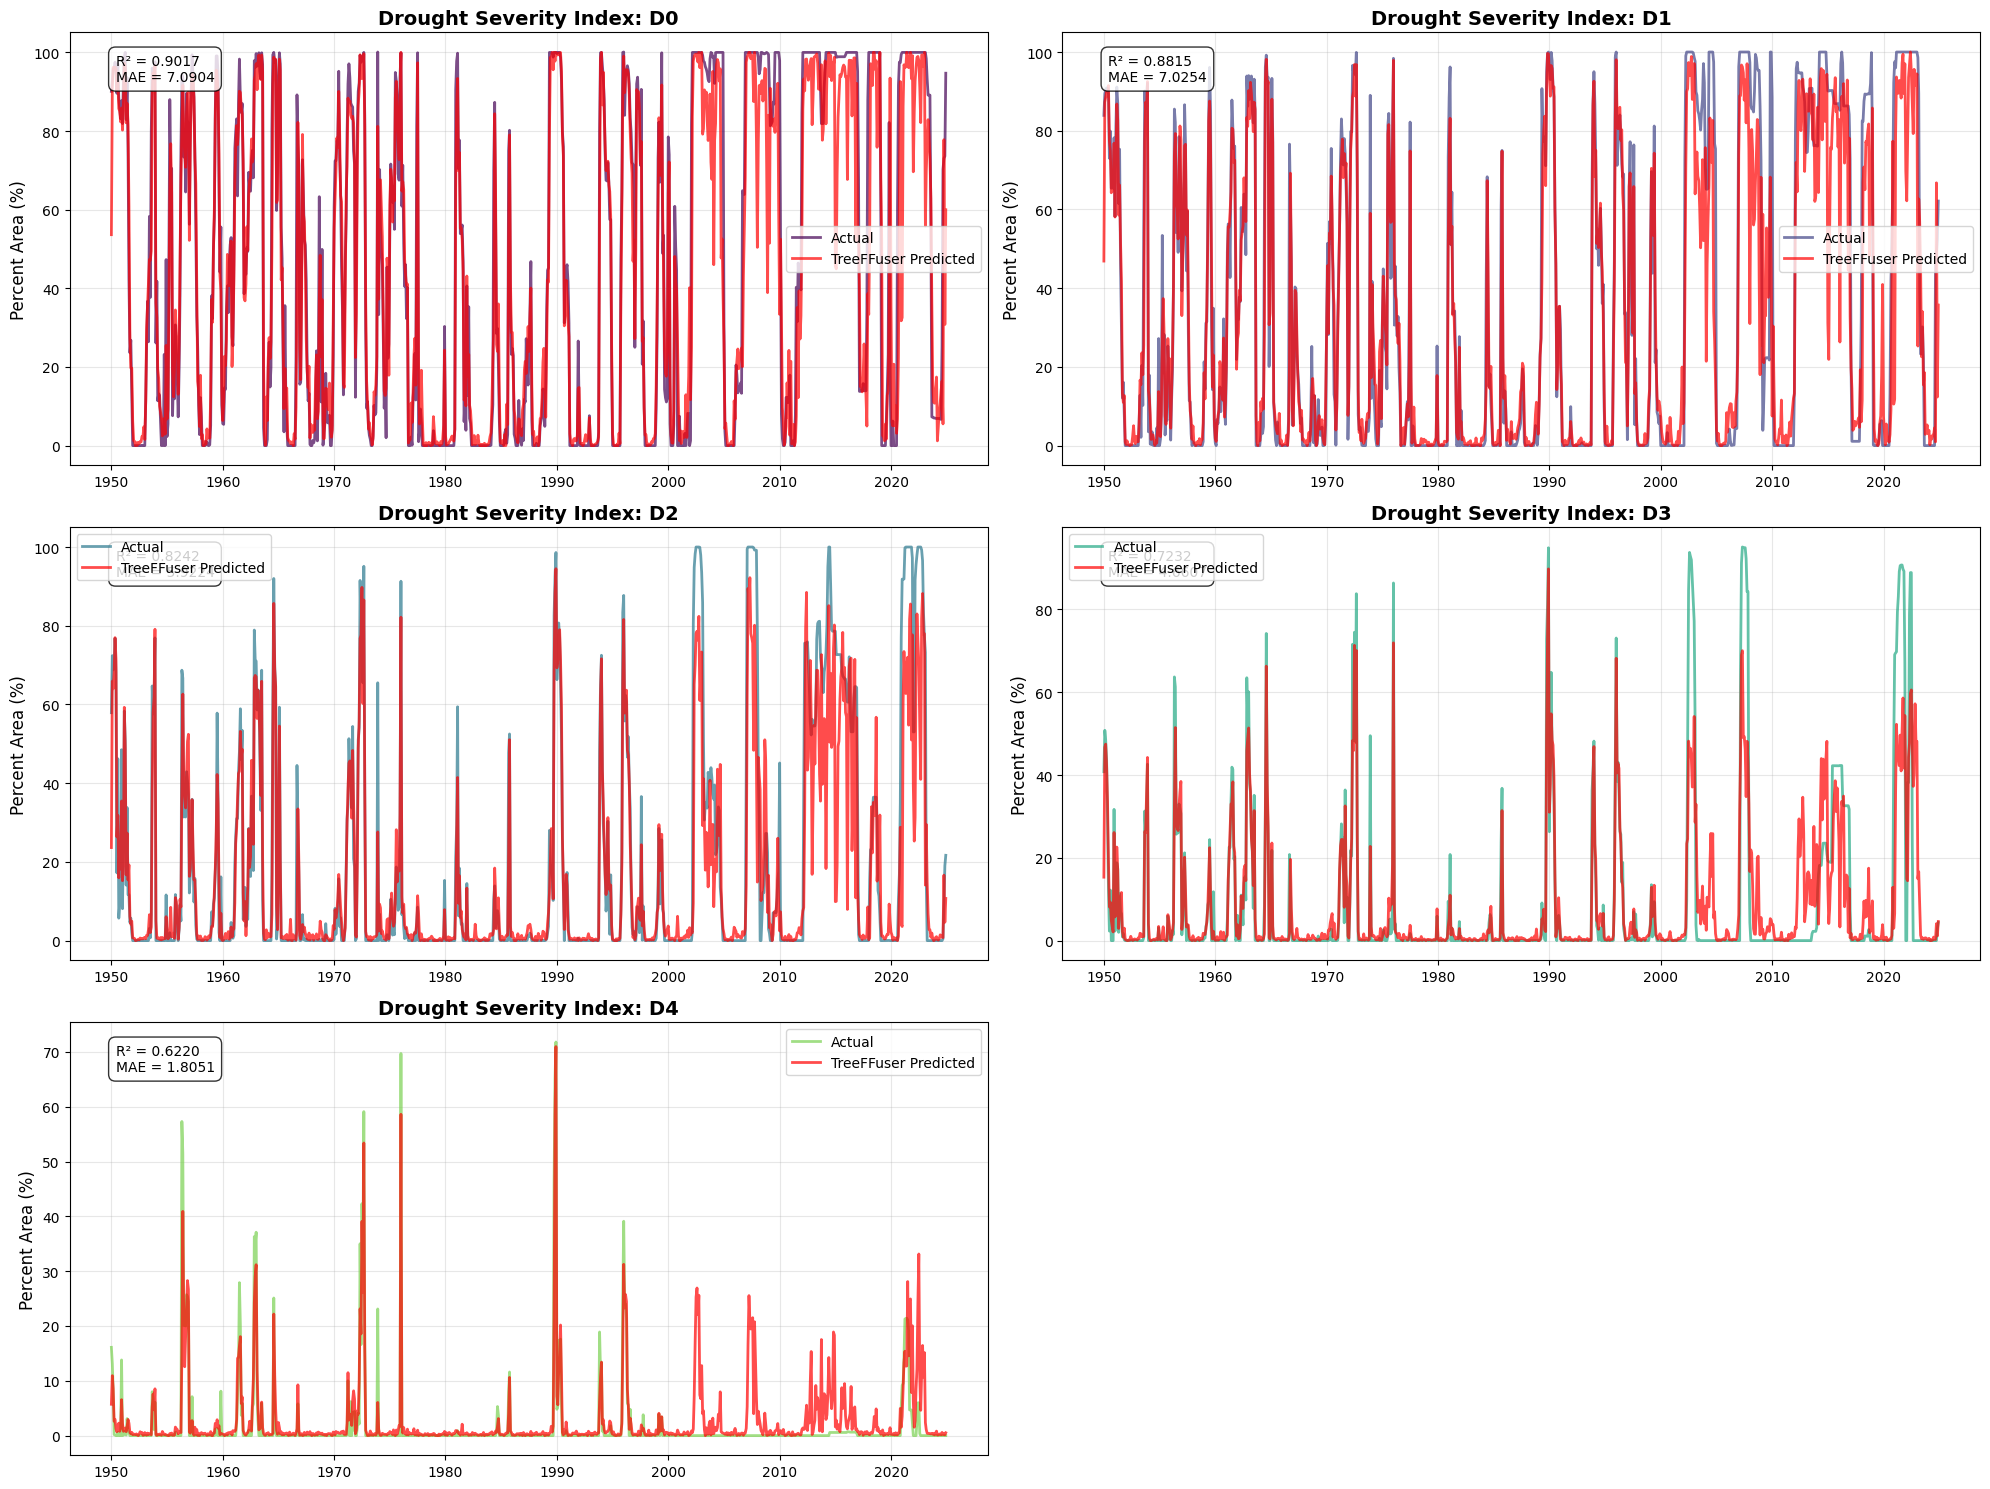

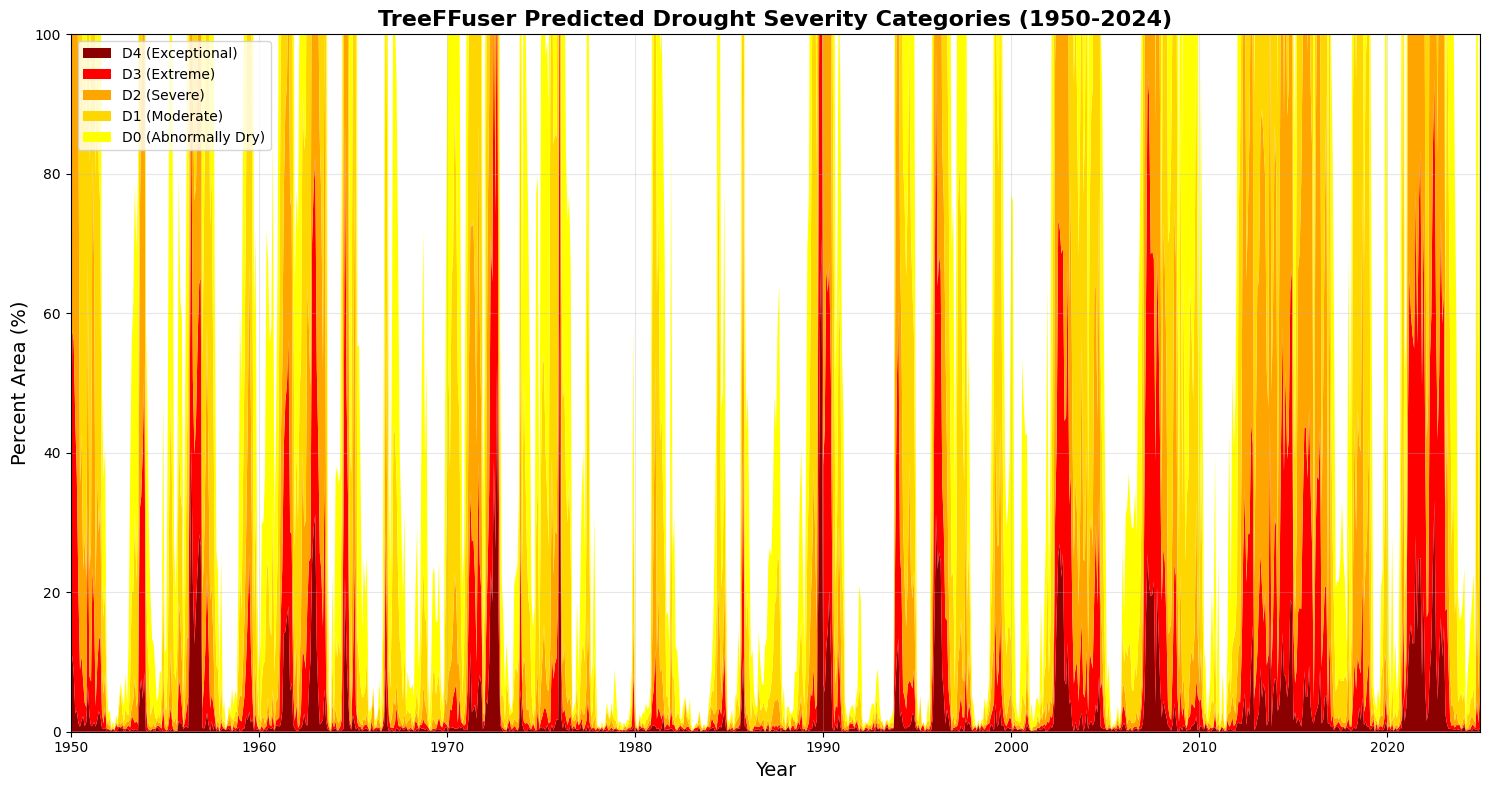

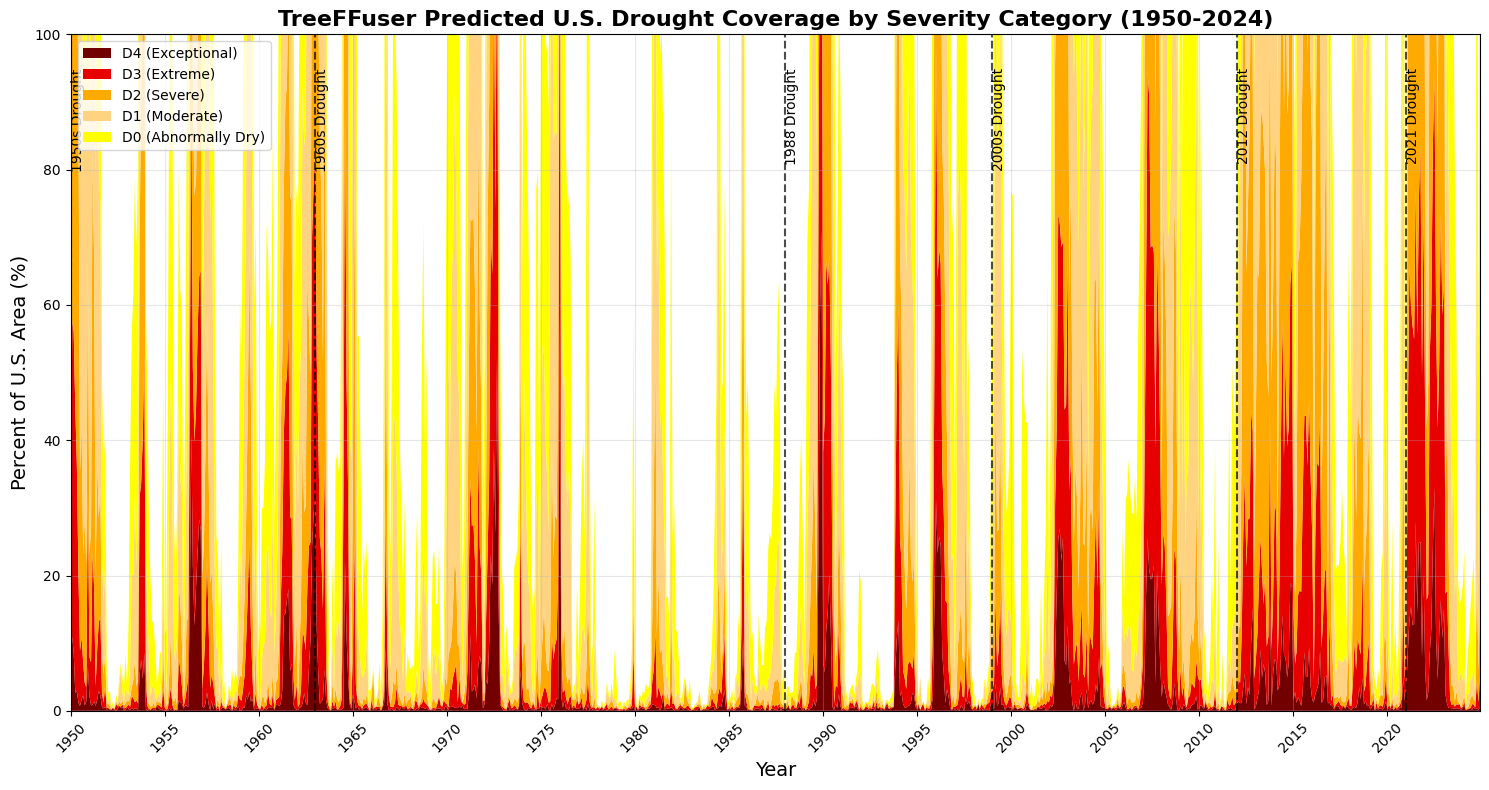

In [40]:
# TreeFFuser for Historical Drought Prediction (1950-2024)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
from joblib import Parallel, delayed, dump, load
import time
import os
warnings.filterwarnings('ignore')

# Import TreeFFuser
try:
    from treeffuser import Treeffuser
except ImportError:
    print("TreeFFuser not installed. Please install it using: pip install treeffuser")
    print("Continuing with code execution for reference...")

# Record start time for performance benchmarking
start_time = time.time()

# Custom helper functions
def print_section(title):
    """Print a section header to make output more readable"""
    print("\n" + "="*80)
    print(f" {title} ".center(80, "="))
    print("="*80)

print_section("LOADING AND PREPARING DATA")

# Create a cache directory if it doesn't exist
os.makedirs('model_cache', exist_ok=True)

# Load historical data file
historical_df = pd.read_csv('final_historical.csv')

# Convert dates
historical_df['date'] = pd.to_datetime(historical_df['date'])

# Define train and test periods
# Use data up to 2000 for training, predict the full period
train_cutoff = '2000-12-31'
train_df = historical_df[historical_df['date'] <= train_cutoff].copy()
test_df = historical_df.copy()  # Full dataset to predict

print(f"Historical data: {historical_df.shape[0]} rows from {historical_df['date'].min()} to {historical_df['date'].max()}")
print(f"Training data: {train_df.shape[0]} rows from {train_df['date'].min()} to {train_df['date'].max()}")

# Extract month and year as separate features
for df in [train_df, test_df]:
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    # Create seasonal features (sine and cosine transformations)
    df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
    df['month_cos'] = np.cos(2 * np.pi * df['month']/12)

print_section("FEATURE ENGINEERING")

def create_lag_features(df, target_cols, lag_periods=[1, 2, 3, 6, 12], fill_method='monthly_mean'):
    """
    Create lag features for the target columns.
    
    Parameters:
    df: DataFrame with time-indexed data
    target_cols: List of columns to create features for (D0-D4)
    lag_periods: List of lag periods in months
    fill_method: Method to fill missing values ('monthly_mean' or 'forward_fill')
    
    Returns:
    DataFrame with added features
    """
    df = df.copy()
    
    # Ensure the dataframe is sorted by date
    df = df.sort_values('date')
    
    # Pre-calculate monthly means for filling
    if fill_method == 'monthly_mean':
        monthly_means = {col: df.groupby('month')[col].mean() for col in target_cols if col in df.columns}
    
    # Create lag features for each target column
    for col in target_cols:
        if col in df.columns:
            for lag in lag_periods:
                lag_col = f'{col}_lag_{lag}'
                df[lag_col] = df[col].shift(lag)
                
                # Fill missing values
                if fill_method == 'monthly_mean' and lag_col in df.columns:
                    # Use broadcasting for faster filling
                    mask = df[lag_col].isna()
                    if mask.any():
                        df.loc[mask, lag_col] = df.loc[mask, 'month'].map(monthly_means[col])
                elif fill_method == 'forward_fill':
                    df[lag_col] = df[lag_col].ffill()
        else:
            print(f"Warning: Target column {col} not found in dataframe")
    
    return df

# Set up parameters
target_cols = ['D0', 'D1', 'D2', 'D3', 'D4']
lag_periods = [1, 2, 3, 6, 12]  # Various lag periods to capture different time scales

# Apply feature engineering
train_df_features = create_lag_features(train_df, target_cols, lag_periods)
test_df_features = create_lag_features(test_df, target_cols, lag_periods)

# Print descriptive statistics of target columns
print("\nTarget variable statistics:")
for col in target_cols:
    stats = train_df[col].describe()
    print(f"{col}: min={stats['min']:.2f}, max={stats['max']:.2f}, mean={stats['mean']:.2f}, median={stats['50%']:.2f}")

# Drop rows with NaN values in the training data
train_df_features = train_df_features.dropna()
print(f"Training data after feature engineering: {len(train_df_features)} rows")

# Define feature columns
base_feature_cols = ['airtemp', 'baseflow', 'ev', 'rainfall', 'runoff', 'sm', 'snowfall', 'snowwater']
seasonal_features = ['month_sin', 'month_cos']
derived_feature_cols = [col for col in train_df_features.columns 
                       if ('_lag_' in col) and col.split('_')[0] in target_cols]

# Combine all feature columns
feature_cols = base_feature_cols + seasonal_features + derived_feature_cols

print(f"Total number of features: {len(feature_cols)}")
print(f"Base features: {len(base_feature_cols)}")
print(f"Seasonal features: {len(seasonal_features)}")
print(f"Derived features: {len(derived_feature_cols)}")

# Prepare training data
X_train = train_df_features[feature_cols]
Y_train = train_df_features[target_cols]

# Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

print_section("TRAINING TREEFFUSER MODELS")

# Function to train TreeFFuser for each target with fallback options
def train_treeffuser_model(X, y, col_name, n_samples=100, n_estimators=100):
    """Train a TreeFFuser model with graceful fallback if parameters aren't supported"""
    
    print(f"Training TreeFFuser model for {col_name}...")
    
    # Check if model already exists in cache
    model_path = f'model_cache/treeffuser_hist_{col_name}.joblib'
    if os.path.exists(model_path):
        print(f"  Loading cached model for {col_name}")
        model = load(model_path)
        return model
    
    # Try different parameter combinations
    try:
        # First try with n_estimators and seed
        model = Treeffuser(n_estimators=n_estimators, seed=42)
        model.fit(X, y)
        print(f"  Successfully trained with n_estimators and seed parameters")
        
        # Cache the model
        dump(model, model_path)
        return model
    except TypeError:
        try:
            # Try with just n_estimators
            model = Treeffuser(n_estimators=n_estimators)
            model.fit(X, y)
            print(f"  Successfully trained with n_estimators parameter")
            
            # Cache the model
            dump(model, model_path)
            return model
        except TypeError:
            try:
                # Fall back to default parameters
                model = Treeffuser()
                model.fit(X, y)
                print(f"  Successfully trained with default parameters")
                
                # Cache the model
                dump(model, model_path)
                return model
            except Exception as e:
                print(f"  Error training model: {str(e)}")
                raise

# Train models for each target (sequentially if parallel fails)
try:
    # Try parallel processing
    def train_model_wrapper(col):
        model = train_treeffuser_model(X_train_scaled, Y_train[col].values, col, n_estimators=150)
        
        # Evaluate on training data
        samples = model.sample(X_train_scaled, n_samples=100)
        pred_mean = samples.mean(axis=0)
        
        r2 = r2_score(Y_train[col], pred_mean)
        mae = mean_absolute_error(Y_train[col], pred_mean)
        
        print(f"Training metrics for {col}:")
        print(f"  R² score: {r2:.4f}")
        print(f"  MAE: {mae:.4f}")
        
        return col, model, r2, mae
    
    results = Parallel(n_jobs=-1)(delayed(train_model_wrapper)(col) for col in target_cols)
    
    # Process results
    treeffuser_models = {}
    for col, model, r2, mae in results:
        treeffuser_models[col] = model
        
except Exception as e:
    print(f"Parallel processing failed: {str(e)}")
    print("Falling back to sequential processing")
    
    # Train models sequentially
    treeffuser_models = {}
    for col in target_cols:
        treeffuser_models[col] = train_treeffuser_model(X_train_scaled, Y_train[col].values, col, n_estimators=150)
        
        # Evaluate on training data
        samples = treeffuser_models[col].sample(X_train_scaled, n_samples=100)
        pred_mean = samples.mean(axis=0)
        
        r2 = r2_score(Y_train[col], pred_mean)
        mae = mean_absolute_error(Y_train[col], pred_mean)
        
        print(f"Training metrics for {col}:")
        print(f"  R² score: {r2:.4f}")
        print(f"  MAE: {mae:.4f}")

print_section("MAKING HISTORICAL PREDICTIONS WITH TREEFFUSER")

def predict_historical_treeffuser(models, scaler, historical_df, feature_cols, target_cols, lag_periods,
                                 n_samples=100, batch_size=24):
    """
    Make predictions for the entire historical period using a sliding window approach.
    This implementation handles feature creation and predictions efficiently.
    """
    print("\nMaking historical predictions with TreeFFuser...")
    
    # Create a copy to work with
    df = historical_df.copy()
    
    # Ensure date is sorted
    df = df.sort_values('date').reset_index(drop=True)
    
    # Create month and seasonal features if they don't exist
    if 'month' not in df.columns:
        df['month'] = df['date'].dt.month
    if 'month_sin' not in df.columns:
        df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
    if 'month_cos' not in df.columns:
        df['month_cos'] = np.cos(2 * np.pi * df['month']/12)
    
    # Create lag features
    df_with_features = create_lag_features(df, target_cols, lag_periods)
    
    # Drop rows with NaN values (initial rows may have NaNs in lag features)
    df_with_features = df_with_features.dropna()
    print(f"Rows after feature engineering: {len(df_with_features)}")
    
    # Extract features
    X_features = df_with_features[feature_cols]
    
    # Scale features
    X_scaled = scaler.transform(X_features)
    
    # Create dataframe for predictions
    predictions_df = df_with_features[['date']].copy()
    
    # Process in batches for better performance
    total_rows = len(X_scaled)
    for start_idx in range(0, total_rows, batch_size):
        end_idx = min(start_idx + batch_size, total_rows)
        print(f"Processing batch: rows {start_idx} to {end_idx-1}...")
        
        X_batch = X_scaled[start_idx:end_idx]
        
        # Make predictions for each target
        for col in target_cols:
            model = models[col]
            
            # Generate samples
            samples = model.sample(X_batch, n_samples=n_samples)
            
            # Use mean as prediction
            pred_mean = samples.mean(axis=0)
            
            # Store predictions
            predictions_df.loc[predictions_df.index[start_idx:end_idx], col] = pred_mean
    
    print("Historical predictions complete")
    
    # Ensure predictions are within realistic bounds (0-100)
    for col in target_cols:
        predictions_df[col] = predictions_df[col].clip(0, 100)
    
    # Merge predictions with dates from original dataframe to get full time range
    full_predictions = pd.merge(
        historical_df[['date']], 
        predictions_df,
        on='date',
        how='left'
    )
    
    return full_predictions

# Make predictions for the full historical period
historical_predictions = predict_historical_treeffuser(
    treeffuser_models, 
    scaler, 
    test_df, 
    feature_cols, 
    target_cols, 
    lag_periods,
    n_samples=100, 
    batch_size=50
)

# Save the predictions to CSV
historical_predictions.to_csv('treeffuser_historical_predictions.csv', index=False)
print("Predictions saved to 'treeffuser_historical_predictions.csv'")

print_section("VISUALIZING RESULTS")

# Create visualization comparing actual vs. predicted values
plt.figure(figsize=(20, 15))
cmap = plt.cm.get_cmap('viridis')
colors = [cmap(i/len(target_cols)) for i in range(len(target_cols))]

# Get actual data
actual_df = test_df.copy()

# Merge actual with predictions where we have both
comparison_df = pd.merge(
    actual_df[['date'] + target_cols], 
    historical_predictions,
    on='date', 
    how='inner',
    suffixes=('_actual', '')
)

# Plot each drought category
for i, (col, color) in enumerate(zip(target_cols, colors)):
    plt.subplot(3, 2, i+1)
    
    # Plot actual values
    plt.plot(comparison_df['date'], comparison_df[f'{col}_actual'], 
             color=color, alpha=0.7, linewidth=2, label='Actual')
    
    # Plot predictions
    plt.plot(comparison_df['date'], comparison_df[col], 
             color='red', alpha=0.7, linewidth=2, label='TreeFFuser Predicted')
    
    # Calculate metrics
    r2 = r2_score(comparison_df[f'{col}_actual'], comparison_df[col])
    mae = mean_absolute_error(comparison_df[f'{col}_actual'], comparison_df[col])
    
    plt.title(f'Drought Severity Index: {col}', fontsize=14, fontweight='bold')
    plt.ylabel('Percent Area (%)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Add metrics annotation
    textstr = f'R² = {r2:.4f}\nMAE = {mae:.4f}'
    props = dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8)
    plt.annotate(textstr, xy=(0.05, 0.95), xycoords='axes fraction',
                 fontsize=10, verticalalignment='top', bbox=props)

plt.tight_layout()
plt.savefig('treeffuser_historical_comparison.png', dpi=300, bbox_inches='tight')
print("Comparison visualization saved to 'treeffuser_historical_comparison.png'")

# Create stacked area chart for predictions (similar to your RandomForest visualization)
plt.figure(figsize=(15, 8))

# Prepare data for stacked area chart
stacked_df = historical_predictions.copy()

# Make sure the data is sorted by date
stacked_df = stacked_df.sort_values('date')

# Create stacked area chart
plt.stackplot(stacked_df['date'], 
              stacked_df['D4'], stacked_df['D3'], stacked_df['D2'], stacked_df['D1'], stacked_df['D0'],
              labels=['D4 (Exceptional)', 'D3 (Extreme)', 'D2 (Severe)', 'D1 (Moderate)', 'D0 (Abnormally Dry)'],
              colors=['darkred', 'red', 'orange', 'gold', 'yellow'])

plt.title('TreeFFuser Predicted Drought Severity Categories (1950-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percent Area (%)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')
plt.xlim(stacked_df['date'].min(), stacked_df['date'].max())
plt.ylim(0, 100)

plt.tight_layout()
plt.savefig('treeffuser_stacked_drought.png', dpi=300, bbox_inches='tight')
print("Stacked visualization saved to 'treeffuser_stacked_drought.png'")

# Create a second stacked chart with a different color scheme and better readability
plt.figure(figsize=(15, 8))

# Define a drought-specific color palette from most to least severe
drought_colors = ['#730000', '#E60000', '#FFAA00', '#FFD37F', '#FFFF00']

plt.stackplot(stacked_df['date'], 
              stacked_df['D4'], stacked_df['D3'], stacked_df['D2'], stacked_df['D1'], stacked_df['D0'],
              labels=['D4 (Exceptional)', 'D3 (Extreme)', 'D2 (Severe)', 'D1 (Moderate)', 'D0 (Abnormally Dry)'],
              colors=drought_colors)

# Add reference lines for major drought events
drought_events = [
    ('1950s Drought', '1950-01-01', '1957-12-31'),
    ('1960s Drought', '1963-01-01', '1967-12-31'),
    ('1988 Drought', '1988-01-01', '1988-12-31'),
    ('2000s Drought', '1999-01-01', '2004-12-31'),
    ('2012 Drought', '2012-01-01', '2012-12-31'),
    ('2021 Drought', '2021-01-01', '2021-12-31')
]

for name, start, end in drought_events:
    # Convert to datetime
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    
    # Check if dates are within our data range
    if start_date >= stacked_df['date'].min() and start_date <= stacked_df['date'].max():
        # Add a vertical line at the start of major drought periods
        plt.axvline(x=start_date, color='black', linestyle='--', alpha=0.7)
        
        # Add a label
        plt.text(start_date, 95, name, rotation=90, verticalalignment='top')

plt.title('TreeFFuser Predicted U.S. Drought Coverage by Severity Category (1950-2024)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percent of U.S. Area (%)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')
plt.xlim(stacked_df['date'].min(), stacked_df['date'].max())
plt.ylim(0, 100)

# Format x-axis to show years only
from matplotlib.dates import YearLocator, DateFormatter
plt.gca().xaxis.set_major_locator(YearLocator(5))  # Show every 5 years
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('treeffuser_stacked_drought_enhanced.png', dpi=300, bbox_inches='tight')
print("Enhanced stacked visualization saved to 'treeffuser_stacked_drought_enhanced.png'")

# Calculate execution time
end_time = time.time()
print(f"\nTotal execution time: {end_time - start_time:.2f} seconds")

print_section("FORMAT DATA FOR EXTERNAL PLOTTING")

# Save data in a format convenient for external plotting
# This includes cleaning up the predictions file
export_df = historical_predictions[['date', 'D0', 'D1', 'D2', 'D3', 'D4']].copy()

# Ensure data is properly sorted
export_df = export_df.sort_values('date')

# Make sure all predictions are within bounds
for col in target_cols:
    export_df[col] = export_df[col].clip(0, 100)

# Round values to 2 decimal places for cleaner output
export_df[target_cols] = export_df[target_cols].round(2)

# Format date as string for easier processing in other tools
export_df['date_str'] = export_df['date'].dt.strftime('%Y-%m-%d')

# Save clean export file
export_df.to_csv('treeffuser_drought_predictions_clean.csv', index=False)
print("Clean data for external plotting saved to 'treeffuser_drought_predictions_clean.csv'")

# Print the first few rows of the export data
print("\nSample of export data:")
print(export_df.head())

print("\nScript execution complete!")